In [1]:
#!pip install seaborn

**Исследование объявлений о продаже квартир**

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Ваша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

**Описание данных:**

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

### 1. Откройте файл с данными и изучите общую информацию. 

**Импортируем необходимые библиотеки и загружаем данные из файла в датафрейм:**

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
try:
    data = pd.read_csv('C:/Users/Acer/Desktop/пятый спринт/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

**Рассмотрим полученные данные из датафрейма:**

In [4]:
# Выведем первые 5 строк датафрейма
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
# Выведем основные характеристика датафрейма (типы столбцов, пропущенные значения)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Вывод: Всего в датафрейме 23 699 объявлений о продаже квартир и 22 столбца, в более половине которых пропущены значения. Также можно отметить, что значения столбца `is_apartment` не соответствуют булеву типу, а значения столбца`first_day_exposition` не соответствуют типу данных datetime. Тип данных столбцов `floors_total`, `balcony`, `parks_nearest`, `ponds_nearest` и `days_exposition` следует изменить на целочисленный.

### 2. Предобработка данных

In [6]:
# Создадим функцию, которая подсчитывает и выводит количество пропущенных значений в столбцах
def missing_value(data, col):
    if data[col].count() != max(data.count()):
        print(f'В столбце {col} пропущено {data[col].isna().sum()} значений'
              f'({data[col].isna().sum() / max(data.count()):.2%})'
              f' от общего числа объявлений')

In [209]:
# Напишем функцию для отображения гистограмм и диаграмм размаха в одной ячейке:
def figure_two(figure, kde):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 7))
    sns.histplot(data[figure], 
                 discrete=True, 
                 binwidth=10, 
                 color=sns.color_palette('deep')[0], 
                 bins=100,
                 ax=ax1,
                 kde=kde
    ).grid(axis='x')
    sns.set_style("whitegrid")
    
    sns.boxplot(data[figure], ax=ax2, color=sns.color_palette('deep')[0])
    sns.set_style("whitegrid")
    plt.xlabel(figure, fontsize=10)

**Рассмотрим каждый отдельный столбец и заполним пропущенные значения там, где это возможно.**

**1. Столбец `ceiling_height` - высота потолков (м)**

In [8]:
# Рассмотрим основные характеристика столбца:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [9]:
missing_value(data, 'ceiling_height')

В столбце ceiling_height пропущено 9195 значений(38.80%) от общего числа объявлений


Отметим, что максимальное зачение в столбце составляет 100 метров, а минимальное - 1 метр.

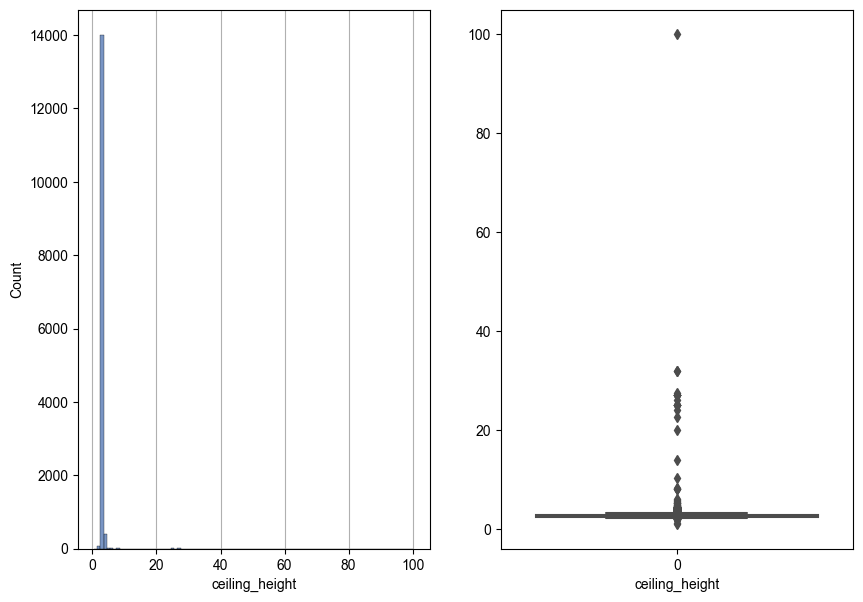

In [10]:
figure_two('ceiling_height', False)

 Судя по графикам, в столбце `ceiling_height` присутствуют значения высоты потолка от 15. Найдем количество квартир с высотой потолков больше 15 метров:

In [11]:
data[data['ceiling_height'] > 15]['ceiling_height'].count()

23

Так как маловероятно, что существуют квартиры с высотой потолков более 15 метров, предположим, что в данных 23 значениях была допущена ошибка и значения должны быть в 10 раз меньше:

In [12]:
data.loc[data['ceiling_height'] > 15, 'ceiling_height'] = data['ceiling_height'] / 10

Минимальное значения высоты потолка в данных - 1 метр. Так как данное значение также маловероятно можно найти в обычных жилых квартирах, проверим, присутствуют ли значения с высотой потолка менее 2.5 метров:

In [13]:
data[data['ceiling_height'] < 2.5].sort_values(by='last_price', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16446,6,12300000.0,88.3,2019-03-12T00:00:00,3,2.00,5.0,63.9,2,NaN,...,12.0,NaN,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
13271,8,8500000.0,65.0,2017-09-25T00:00:00,3,2.40,5.0,40.0,1,NaN,...,18.0,NaN,Санкт-Петербург,24555.0,4122.0,1.0,532.0,3.0,355.0,105.0
193,6,7920000.0,83.8,2017-08-17T00:00:00,4,2.47,9.0,55.9,9,NaN,...,9.8,1.0,Санкт-Петербург,30352.0,7724.0,0.0,NaN,1.0,289.0,155.0
987,12,7100000.0,65.5,2016-03-30T00:00:00,4,2.46,5.0,51.0,4,NaN,...,9.4,0.0,Санкт-Петербург,24542.0,5110.0,1.0,572.0,0.0,NaN,82.0
11868,10,7000000.0,60.0,2017-11-17T00:00:00,2,2.40,12.0,45.0,6,NaN,...,11.0,2.0,Санкт-Петербург,16106.0,15255.0,1.0,761.0,0.0,NaN,40.0


In [14]:
data[data['ceiling_height'] < 2.5]['ceiling_height'].count()

76

Таких квартир целых 76. Исходя из невысокой цены в столбце `last_price`, мы не можем увеличить высоту потолка, например, в 10 раз. Так как таких квартир всего три, заменим значения в данных объявлениях на медианное:

In [15]:
data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'] = data['ceiling_height'].median()

In [16]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.731413
std          0.317844
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

Посмотрим, существует ли зависимость между значениями столбца `ceiling_height` и значениями других столбцов датфрейма:

In [212]:
data.corr()['ceiling_height'].sort_values(ascending=False)

C:\Users\Acer\AppData\Local\Temp\ipykernel_1492\3852440981.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['ceiling_height'].sort_values(ascending=False)


ceiling_height         1.000000
total_area             0.348716
last_price             0.339681
living_area            0.321460
kitchen_area           0.274723
square_meter_price     0.260989
rooms                  0.199858
parks_around3000       0.195012
ponds_around3000       0.165823
days_exposition        0.108728
is_apartment           0.050808
total_images           0.045898
studio                 0.010567
month                  0.000749
open_plan             -0.001923
day_of_week           -0.014434
balcony               -0.036339
floor                 -0.037745
year                  -0.047298
parks_nearest         -0.050080
floors_total          -0.069545
airports_nearest      -0.075730
ponds_nearest         -0.099548
cityCenters_nearest   -0.258894
Name: ceiling_height, dtype: float64

Явной зависимости не наблюдается. 
Причиной столь большого количества пропусков может быть то, что авторы публикаций посчитали данное значение стандратным. В случае больших значений потолка, авторы обязательно указали бы данное значение, так как это является плюсом для квартиры.
В многоквартирных домах России в зависимости от регинона стандартное значение потолка должно быть не ниже 2,5 м или 2,7 м. Медиана столбца `ceiling_height` равна 2.65. В столбце `ceiling_height` разброс значений достаточно большой, поэтому заполним данным значением медианы все пропуски:

In [18]:
data['ceiling_height'] = data['ceiling_height'].fillna(value=data['ceiling_height'].median())

Проверим, остались ли пропуски в столбце `ceiling_height`:

In [19]:
data['ceiling_height'].isna().sum()

0

In [20]:
# Рассмотрим изменение основных характеристик столбца:
data['ceiling_height'].describe()

count    23699.000000
mean         2.699826
std          0.251795
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

Пропусков нет. Посмотрим, как изменились графики:

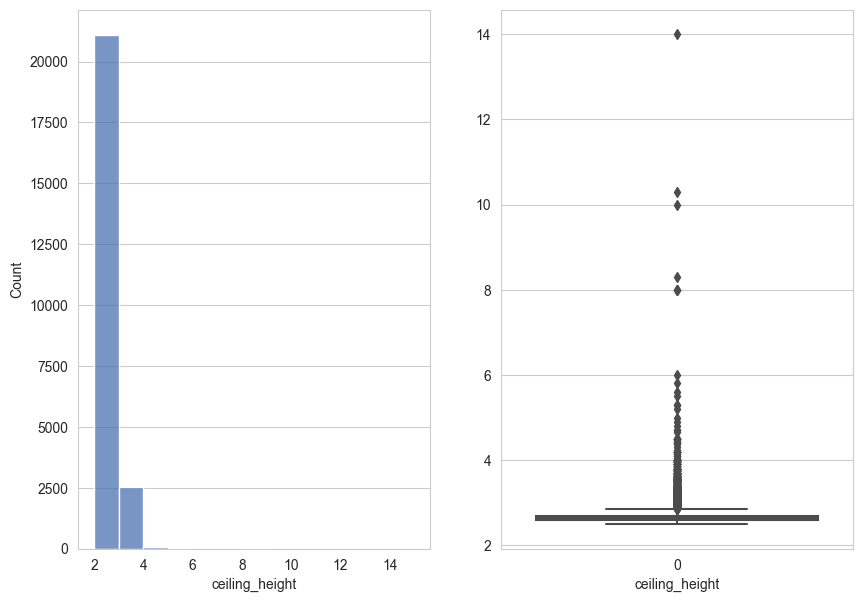

In [21]:
figure_two('ceiling_height', False)

Так как мы заполнили пропуски медианой, увеличилось число публикаций со значением 2.65 м, что подтверждается гистограммой. Так же можно заметить, что минимальные значения стали равны 2,5 метрам.

**2. Столбец `floors_total` — всего этажей в доме**

In [22]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [23]:
missing_value(data, 'floors_total')

В столбце floors_total пропущено 86 значений(0.36%) от общего числа объявлений


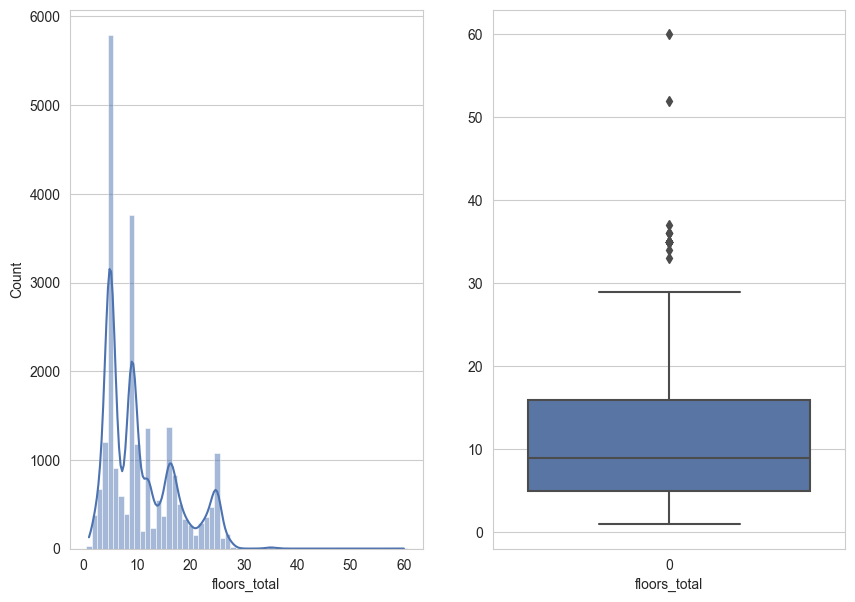

In [24]:
figure_two('floors_total', True)

Отрицательных значений нет, выбросов немного. Этажность домов от 30 этажей вполне возможна в больших городах. Достаточно много 4-этажных и 10-этажных домов.

Строк с пропущенными значениями не так много, поэтому пока оставим данные строки.

**3. Столбец `living_area` - жилая площадь в квадратных метрах (м²)**

In [27]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [28]:
missing_value(data, 'living_area')

В столбце living_area пропущено 1903 значений(8.03%) от общего числа объявлений


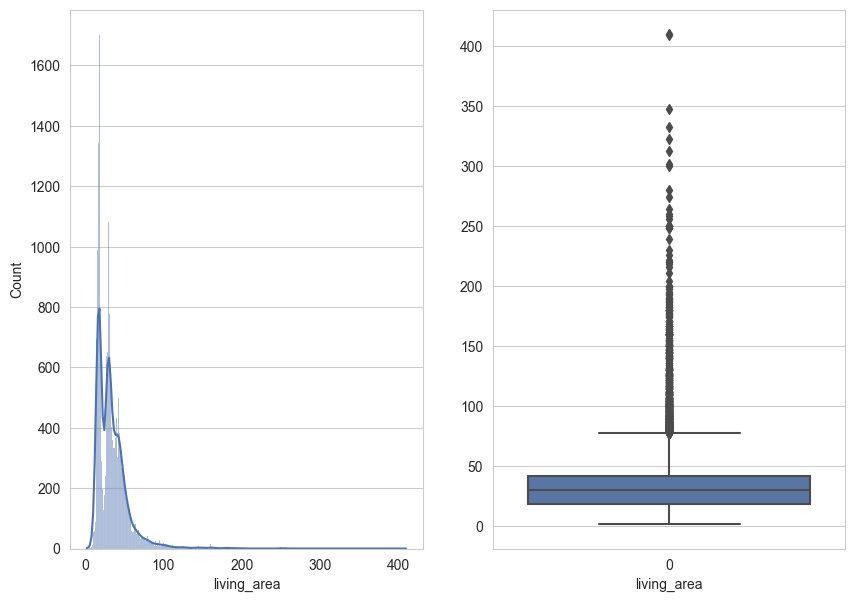

In [29]:
figure_two('living_area', True)

Рассмотрим объявления с квартирами с жилой площадью в 270 кв.м, так как в соответствии с диаграммой размаха, таких объявлений-выбросов немного и они расположены выше максимального значения :

In [30]:
data[data['living_area'] > 270]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
660,3,49950000.0,483.9,2017-10-04T00:00:00,7,3.20,6.0,312.5,4,NaN,...,26.4,NaN,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
4237,1,50000000.0,517.0,2017-10-14T00:00:00,7,2.65,4.0,332.0,3,NaN,...,22.0,NaN,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
8018,20,84000000.0,507.0,2015-12-17T00:00:00,5,4.45,7.0,301.5,7,True,...,45.5,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
12401,20,91500000.0,495.0,2017-06-19T00:00:00,7,4.65,7.0,347.5,7,NaN,...,25.0,0.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.90,4.0,322.3,4,NaN,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
14088,8,51000000.0,402.0,2017-02-07T00:00:00,6,3.15,8.0,300.0,6,NaN,...,56.0,2.0,Санкт-Петербург,24484.0,5052.0,1.0,253.0,0.0,NaN,32.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
20273,12,20000000.0,460.8,2019-03-20T00:00:00,6,3.10,3.0,279.6,1,NaN,...,55.5,NaN,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,21.0
22494,7,91075000.0,491.0,2017-05-27T00:00:00,5,4.20,9.0,274.0,9,NaN,...,45.0,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,115.0


В столбце `last_price` и `total_area` можно заметить достаточно большие значения, что объяснимо: квартиры с большей площадью стоят дороже. Допустим, что такие квартиры существуют.

In [211]:
data.corr()['living_area'].sort_values(ascending=False)

C:\Users\Acer\AppData\Local\Temp\ipykernel_1492\259170823.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['living_area'].sort_values(ascending=False)


living_area            1.000000
total_area             0.938084
rooms                  0.852791
last_price             0.662271
kitchen_area           0.393772
ceiling_height         0.321460
parks_around3000       0.176051
square_meter_price     0.172975
days_exposition        0.172931
ponds_around3000       0.151425
total_images           0.104699
is_apartment           0.022052
month                  0.005338
balcony               -0.005921
day_of_week           -0.006373
open_plan             -0.023721
parks_nearest         -0.048853
airports_nearest      -0.053817
studio                -0.062847
ponds_nearest         -0.076337
year                  -0.077523
floor                 -0.098655
floors_total          -0.162419
cityCenters_nearest   -0.234317
Name: living_area, dtype: float64

Наблюдается сильная зависимость между значениями столбцов `living_area` и `total_area`. Отобразим ее на диаграмме рассеяния:

Text(0.5, 1.0, 'Living area ~ Total area')

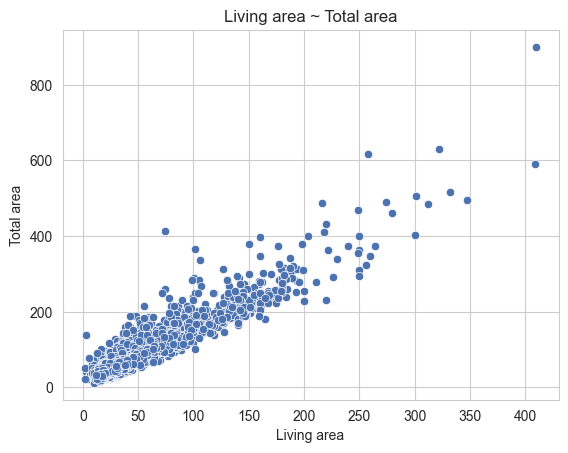

In [32]:
sns.scatterplot(data=data, x='living_area', y='total_area', color=sns.color_palette('deep')[0])
sns.set_style("whitegrid")
plt.xlabel("Living area")
plt.ylabel("Total area")
plt.title("Living area ~ Total area")

Найдем коэффициент для дальнейшего заполнения пропущенных значений путем нахождения среднего от деления столбца `living_area` на `total_area`:

In [33]:
(data['living_area'] / data['total_area']).mean()

0.5647655216993234

С помощью найденного коэффициента, заполним столбец `living_area`:

In [34]:
data.loc[data['living_area'].isna(), 'living_area'] = ((data['living_area'] / data['total_area']).mean()) \
                                                        * data['total_area']

In [35]:
# Округляем значения столбца до двух знаков после запятой
data['living_area'] = round(data['living_area'], 2)

In [36]:
data['living_area'].isnull().sum()

0

In [37]:
data['living_area'].describe()

count    23699.000000
mean        34.562483
std         22.326966
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

Медианное и среднее значения практически не изменились. От пропусков избавились.

**4. Столбец `is_apartment` - апартаменты (булев тип)**

In [38]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [39]:
missing_value(data, 'is_apartment')

В столбце is_apartment пропущено 20924 значений(88.29%) от общего числа объявлений


Заметим, что тип данных столбца не соответствует изначально заявленному - из-за наличия пропусков тип данных изменился на object. Скорее всего, это не ошибка, просто авторы не заполнили данный столбец, так как квартира не является апартаментами, да и сами апартаменты не часто встретишь даже в больших городах. Поэтому заменим пропущенные значения на *False* - то есть обозначим данные объявления как не апартаменты:

In [40]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

In [41]:
data['is_apartment'].unique()

array([False,  True])

Теперь весь столбец заполнен значениями булева типа - True/False.

**5. Столбец `kitchen_area` -  площадь кухни в квадратных метрах (м²)**

In [42]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [43]:
missing_value(data, 'kitchen_area')

В столбце kitchen_area пропущено 2278 значений(9.61%) от общего числа объявлений


В датафрейме есть столбец `studio` со значениями булева типа. В квартирах-студиях обычно кухни как таковой нет, поэтому заменим значение столбца kitchen_area в строках, в которых значение столбца `studio` равно *True*, на 0.

In [44]:
data.loc[data['studio'] == True, 'kitchen_area'] = data['kitchen_area'].fillna(value=0)

In [45]:
data['kitchen_area'].isna().sum()

2129

Теперь пропущенных значений стало 2129.

Определим, есть ли зависимость значений столбца kitchen_area от остальных столбцов:

In [210]:
data.corr()['kitchen_area'].sort_values(ascending=False)

C:\Users\Acer\AppData\Local\Temp\ipykernel_1492\66439533.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['kitchen_area'].sort_values(ascending=False)


kitchen_area           1.000000
total_area             0.597345
last_price             0.577649
living_area            0.393772
square_meter_price     0.363039
ceiling_height         0.274723
rooms                  0.260165
floors_total           0.156791
ponds_around3000       0.139166
days_exposition        0.128560
floor                  0.126671
total_images           0.103731
parks_around3000       0.081615
balcony                0.050287
is_apartment           0.037449
parks_nearest          0.028204
airports_nearest       0.012312
month                  0.006541
day_of_week           -0.010577
open_plan             -0.011332
year                  -0.059027
ponds_nearest         -0.094513
studio                -0.151172
cityCenters_nearest   -0.183012
Name: kitchen_area, dtype: float64

Наибольшая зависимость у столбца `kitchen_area` - со столбцом `total_area`, но не настолько сильная, чтобы заполнить пропущенные значения тем же способом, что и в случае со столцом `living_area`. Попробуем применить категоризацию данных в зависимости от значений столбца `total_area`

In [47]:
#Напишем функцию для категоризации данных в зависимости от значений столбца total_area
def categorize_area(area):
    try:
        if 0 <= area <= 40:
            return 'small'
        elif 40.01 <= area <= 90:
            return 'medium'
        elif 90.01 <= area <= 150:
            return 'large'
        elif area >= 150.1:
            return 'extra-large'
    except:
        pass

In [48]:
data['total_area_category'] = data['total_area'].apply(categorize_area)

Определим медиану во всех категориях и присвоим данные медианные значения в зависимости от категории там, где есть пропуски в столбце kitchen_area

In [49]:
for i in data['total_area_category'].unique():
    data.loc[(data['total_area_category'] == i) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['total_area_category'] == i), 'kitchen_area'].median()

In [50]:
data['kitchen_area'].isna().sum()

0

Теперь пропусков нет.

In [51]:
data['kitchen_area'].describe()

count    23699.000000
mean        10.417348
std          5.740574
min          0.000000
25%          7.200000
50%          9.000000
75%         11.700000
max        112.000000
Name: kitchen_area, dtype: float64

Минимальное значение теперь составляет 0 кв.м., так как присвоили данное значение квартирам-студиям. Соответственно, медиана стала чуть меньше.

**6. Столбец `balcony` - число балконов**

In [52]:
data['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [53]:
missing_value(data, 'balcony')

В столбце balcony пропущено 11519 значений(48.61%) от общего числа объявлений


Чаще всего в квартирах есть 1 балкон, максимальное количество балконов - 5.

Будем считать, что если автор публикации не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски  заменим на 0

In [54]:
data.loc[data['balcony'].isnull(), 'balcony'] = data['balcony'].fillna(value=0)

In [55]:
data['balcony'].isnull().sum()

0

In [56]:
data['balcony'].describe()

count    23699.000000
mean         0.591080
std          0.959298
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

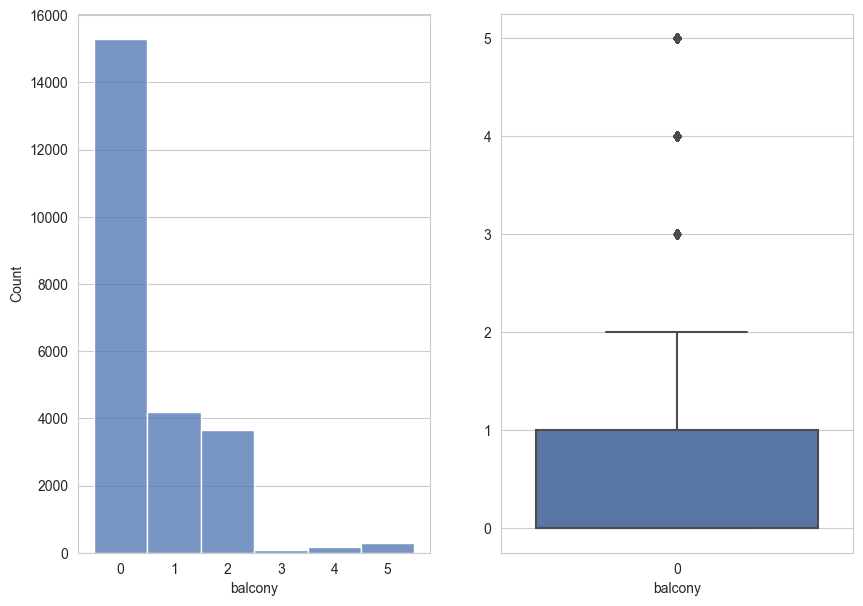

In [57]:
figure_two('balcony', False)

Теперь самое частотное значение - нулевое, так как заменили пропущенные значения на ноль. Меньше всего квартир с 3 балконами. Медиана стала равна нулю.

**7. Столбец `locality_name` - название населённого пункта**

In [58]:
missing_value(data, 'locality_name')

В столбце locality_name пропущено 49 значений(0.21%) от общего числа объявлений


Пропущенных значений не много, заменим пропуски на значение 'другие'.

In [59]:
data.loc[data['locality_name'].isna(), 'locality_name'] = 'другие'

In [60]:
data['locality_name'].isna().sum()

0

От пропусков избавились.

Так как авторы могут по-разному указывать название населенного пункта, а также возможны ошибки при заполнении, необходимо найти неявные дубликаты:

In [61]:
# Переводим наименования пунктов в нижний регистр, заменяем букву 'ё' на 'е', а 'городской поселок'
# на 'поселок городского типа'
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

In [62]:
# Выводим уникальные значения столбца locality_name
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары',
       'поселок городского типа янино-1', 'поселок парголово',
       'поселок мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посел

Добавим в список элементы строк, в которых нет пробелов:

In [63]:
list = []
for i in data['locality_name'].unique():
    if ' ' not in i and i in data['locality_name'].unique():
        list.append(i)  

Заменим значения в столбце locality_name на элементы list при условии, что они входят в наименования столбца locality_name

In [64]:
for i in list:
    for j in data['locality_name'].unique():
        if i in j:
            data['locality_name'] = data['locality_name'].str.replace(j, i)

In [65]:
# Находим число уникальных значений
data['locality_name'].nunique()

316

Заполнили все пропуски и обработали столбец на неявные дубликаты.

**8. Столбец `airports_nearest` - расстояние до ближайшего аэропорта в метрах (м)**

In [66]:
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [67]:
missing_value(data, 'airports_nearest')

В столбце airports_nearest пропущено 5542 значений(23.38%) от общего числа объявлений


Значения данного столбца заполнялись не авторами публикаций, а брались из картографической данных. Пропуски могут быть вызваны как технической ошибкой, так и тем фактом, что в некоторых случаях аэропорты могут располагаться далеко от местоположения квартиры.

In [68]:
data['locality_name'].value_counts().head()

санкт-петербург    15721
мурино               590
кудрово              472
поселок шушары       440
всеволожск           398
Name: locality_name, dtype: int64

In [69]:
data[data['airports_nearest'].isna()]['locality_name'].value_counts().head()

мурино        588
кудрово       472
всеволожск    398
гатчина       307
выборг        237
Name: locality_name, dtype: int64

Можно предположить, что произошла техническая ошибка - например, почти во всех имеющихся объявлениях с местоположением в Мурино и Кудрово нет информации о расстоянии до аэропорта. Так как исправить это вручную может занять очень много времени, а удалить строки с пропусками может исказить дальнейший анализ, оставим данные пропуски как есть.

**9. Столбец `cityCenters_nearest` - расстояние до центра города (м)**

In [70]:
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [71]:
missing_value(data, 'cityCenters_nearest')

В столбце cityCenters_nearest пропущено 5519 значений(23.29%) от общего числа объявлений


In [72]:
data[data['cityCenters_nearest'].isna()]['locality_name'].value_counts().head()

мурино        588
кудрово       472
всеволожск    398
гатчина       307
выборг        237
Name: locality_name, dtype: int64

Можно отметить, что в столбце cityCenters_nearest имеются пропуски в тех же населенных пунктах, что и в столбце airports_nearest. Скорее всего, это все же техническая ошибка. Пропуски оставим.

**10. Столбец `parks_around3000` - число парков в радиусе 3 км**

In [73]:
data['parks_around3000'].describe()

count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [74]:
missing_value(data, 'parks_around3000')

В столбце parks_around3000 пропущено 5518 значений(23.28%) от общего числа объявлений


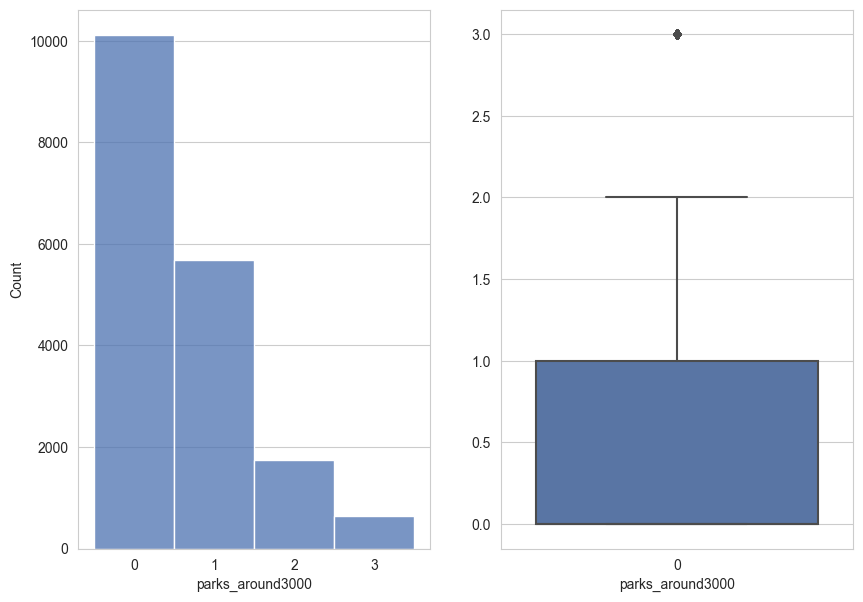

In [75]:
figure_two('parks_around3000', False)

In [76]:
data[data['parks_around3000'].isna()]['locality_name'].value_counts().head()

мурино        588
кудрово       472
всеволожск    398
гатчина       307
выборг        237
Name: locality_name, dtype: int64

Можно отметить, что в столбце parks_around3000 имеются пропуски в тех же населенных пунктах, что и в столбце airports_nearest, также процент пропусков практически совпадает. Скорее всего, это все же техническая ошибка. Пропуски оставим.

**11. Столбец `parks_nearest` - расстояние до ближайшего парка (м)**

In [77]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [78]:
missing_value(data, 'parks_nearest')

В столбце parks_nearest пропущено 15620 значений(65.91%) от общего числа объявлений


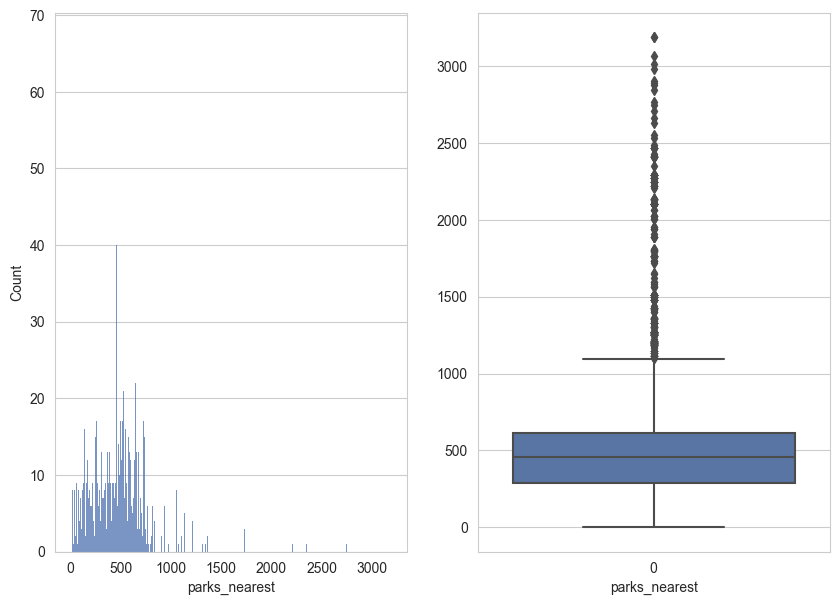

In [79]:
figure_two('parks_nearest', False)

In [80]:
data[data['parks_nearest'].isna()]['locality_name'].value_counts().head()

санкт-петербург    8437
мурино              590
кудрово             472
поселок шушары      440
всеволожск          398
Name: locality_name, dtype: int64

В данном столбце несколько отличаются пропущенные значения, например, большинство пропусков теперь в Санкт-Петербурге. Пока оставим пропуски, возможно, в дальнейшем данный столбец не понадобится.

**12. Столбец `ponds_around3000` - число водоёмов в радиусе 3 км**

In [81]:
data['ponds_around3000'].describe()

count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [82]:
missing_value(data, 'ponds_around3000')

В столбце ponds_around3000 пропущено 5518 значений(23.28%) от общего числа объявлений


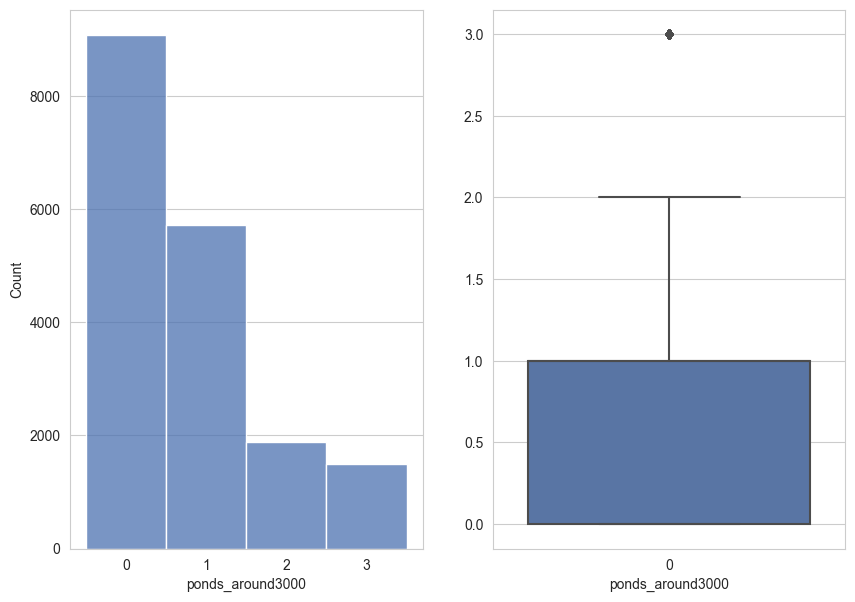

In [83]:
figure_two('ponds_around3000', False)

In [84]:
data[data['ponds_around3000'].isna()]['locality_name'].value_counts().head()

мурино        588
кудрово       472
всеволожск    398
гатчина       307
выборг        237
Name: locality_name, dtype: int64

Можно отметить, что в столбце ponds_around3000 имеются пропуски в тех же населенных пунктах, что и в столбце airports_nearest, также процент пропусков практически совпадает. Скорее всего, это все же техническая ошибка. Пропуски оставим.

**13. Столбец `ponds_nearest` - расстояние до ближайшего водоёма (м)**

In [85]:
data['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [86]:
missing_value(data, 'ponds_nearest')

В столбце ponds_nearest пропущено 14589 значений(61.56%) от общего числа объявлений


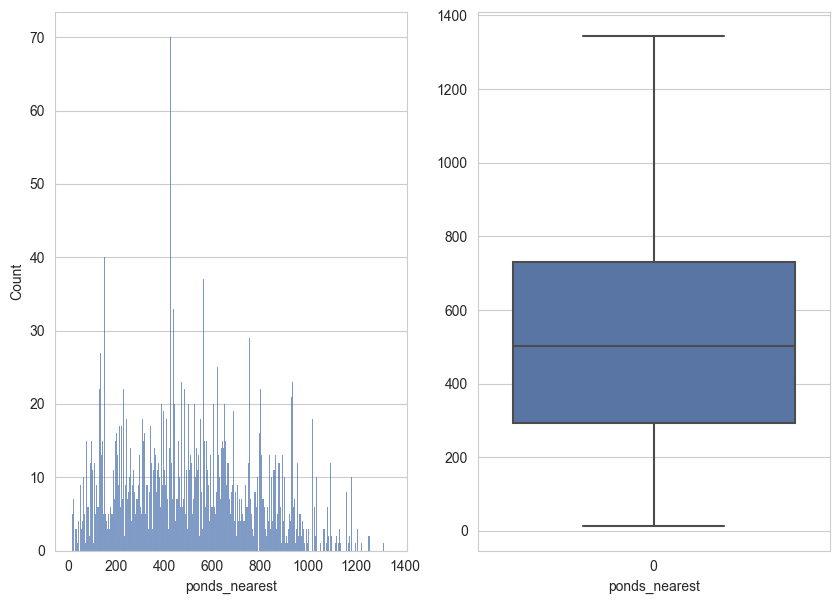

In [87]:
figure_two('ponds_nearest', False)

In [88]:
data[data['ponds_nearest'].isna()]['locality_name'].value_counts().head()

санкт-петербург    7738
мурино              588
кудрово             472
всеволожск          398
гатчина             307
Name: locality_name, dtype: int64

В данном столбце отличаются пропущенные значения, например, большинство пропусков теперь в Санкт-Петербурге. Пока оставим пропуски, возможно, в дальнейшем данный столбец не понадобится.

**14. Столбец `days_exposition` - сколько дней было размещено объявление (от публикации до снятия)**

In [89]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [90]:
missing_value(data, 'days_exposition')

В столбце days_exposition пропущено 3181 значений(13.42%) от общего числа объявлений


In [91]:
data['days_exposition'].value_counts().head(10)

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
Name: days_exposition, dtype: int64

Интересно, что наиболее часто встречающиеся значения выпали на 45 (1,5 месяца), 60 (месяц), 7 (неделя), 30 (месяц), 90 дней (три месяца). Такое могло быть при таких настройках, при которых объявления автоматически архивировались по прошествии определенного количества дней. 

В 3181 объявлении имеются пропуски. Причин может быть несколько: либо это все еще актуальные объявления, либо именно в данных ячейках произошла техническая ошибка и дни не были заполнены.

Попробуем найти самую позднюю дату в столбце first_day_exposition, в котором все значения заполнены. Сначала переведем столбец first_day_exposition в тип данных to_datetime

In [92]:
# Переводим столбец first_day_exposition в тип данных to_datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [93]:
max(data['first_day_exposition'])

Timestamp('2019-05-03 00:00:00')

Самая поздняя дата - 3 мая 2019 года. Предположим, что это может быть датой выгрузки всех объявлений

In [94]:
data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'] \
.fillna(value=(max(data['first_day_exposition']) - data['first_day_exposition']).astype('timedelta64[D]'))

In [95]:
data['days_exposition'].isna().sum()

0

In [96]:
data['days_exposition'].describe()

count    23699.000000
mean       185.821722
std        233.380877
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

После обработки данных, минимальное значение стало равно 0. Возможно, в дальнейшем потребуется удалить данные значения. Медианное значение уменьшилось на 1 пункт, так как стало больше нулевых значений.

**Вывод - обработали пропущенные значения в следующих столбцах:**
- `ceiling_height` (высота потолков (м)) - заполнили пропущенные значения (9195), а также значения до 2.5 метров медианой 2.65 метров, так как это согласуется с тем, что в многоквартирных домах России в зависимости от региона стандартное значение потолка должно быть не ниже 2,5 м или 2,7 м. Значения потолков от 15 метров уменьшили в 10 раз.
- `floors_total` (всего этажей в доме) - оставили  86 пропущенных значений ввиду их малого количества и недостаточной корреляции с другими столбцами.
- `living_area` (жилая площадь в квадратных метрах (м²)) - с помощью коэффициента среднего от деления столбца living_area на total_area в связи с сильной корреляцией между данными столбцами заполнили все 1903 пропуска
- `is_apartmen` (апартаменты) - заполнили 20924 пропусков типом False (не апартаменты), так как скорее всего, авторы публикаций не заполняли данный столбец, если квартира не являлась апартаментами.
- `kitchen_area` (площадь кухни в квадратных метрах (м²)) - заполнили 2278 пропусков медианными значениями по категориям общей площади, а также нулевыми значениями в случае, когда квартира является студией
- `balcony` (число балконов) - пропущенные значения (11919) заполнили нулями, так как авторы публикаций, вероятно, оставили данное поле пустым в случае отсутствия балконов в квартире.
- `locality_name` (название населённого пункта) - пропущенные значения, их всего 49, отнесли к категории 'другие'. Также избавились от неявных дубликатов.
- `airports_nearest` (расстояние до ближайшего аэропорта в метрах (м)), `cityCenters_nearest` (расстояние до центра города (м)), `parks_around3000` (число парков в радиусе 3 км), `parks_nearest` (расстояние до ближайшего парка (м)), `ponds_around3000` (число водоёмов в радиусе 3 км), `ponds_nearest` (расстояние до ближайшего водоёма (м)) - оставили пропущенные значения, так как они вызваны технической ошибкой - в столбце cityCenters_nearest, ponds_around3000  и parks_around3000 имеются пропуски в тех же населенных пунктах, что и в столбце airports_nearest; в столбцах parks_nearest и ponds_nearest пропцщены значения в тех же населенных пунктах, а так же доля пропущенных значений приблизительно равна.
- `days_exposition` (сколько дней было размещено объявление (от публикации до снятия)) - 3181 пропуск заполнили разницей между самым поздним днем в столбце first_day_exposition (день публикации) и значением столбца first_day_exposition для каждой строки. Выявлено, что наиболее часто встречающиеся значения выпали на 45 (1,5 месяца), 60 (месяц), 7 (неделя), 30 (месяц), 90 дней (три месяца). Такое могло быть при таких настройках, при которых объявления автоматически архивировались по прошествии определенного количества дней.

### 3. Преобразуем типы данных и добавим новые столбцы

In [97]:
# Выведем общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [98]:
# Переводим ц елочисленные значения столбцы balcony, days_exposition
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
try:
    data['parks_around3000'] = data['parks_around3000'].astype('int')
    data['ponds_around3000'] = data['ponds_around3000'].astype('int')
    data['floors_total'] = data['floors_total'].astype('int')
except:
    pass

Тип данных в столбце floors_total изменим, когда обработаем пропущенные значения.

In [99]:
# Добавим новые столбцы: цена за квадратный метр, день недели, месяц и год даты публикации
data['square_meter_price'] = data['last_price'] / data['total_area']
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [100]:
# Напишем функцию для категоризации расположения полов в квартирах
def type_floor(data):
    try:
        total_floor = data['floors_total']
        floor = data['floor']
        if floor == 1:
            return 'первый'
        elif (total_floor - floor) == 0:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'нет данных'

In [101]:
# Применяем функцию type_floor
data['type_floor'] = data.apply(type_floor, axis=1)

In [102]:
# Переводим значения столбца cityCenters_nearest их метров в километры и округляем до целого
data['cityCenters_nearest'] = round(data['cityCenters_nearest'] / 1000, 0)

### Удалим редкие и выбивающиеся значения

 - Рассмотрим столбец floors_total:

In [103]:
missing_value(data, 'floors_total')

В столбце floors_total пропущено 86 значений(0.36%) от общего числа объявлений


Так как выраженной корреляции значений из столбца floors_total с другими столбцами не наблюдается, удалим строки с пропусками:

In [104]:
data = data.dropna(subset=['floors_total'])

 - Рассмотрим столбцы kitchen_area, living_area и total_area:

Сумма жилой площади и площадь кухни не должна превышать общую площадь, так как помимо кухни есть и другие помещения - кладовая, балконы, санузел и тд, которые не входят в жилую площадь. Найдем такие квартиры:

In [105]:
data.query('kitchen_area + living_area > total_area')['kitchen_area'].count()

205

Всего таких квартир 205. Удалим данные объявления, так как корректно поменять их достаточно сложно:

In [106]:
data = data.query('kitchen_area + living_area < total_area')

- Рассмотрим значения столбца last_price:

In [107]:
data['last_price'].describe()

count    2.333500e+04
mean     6.556517e+06
std      1.091115e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Мнимальное значение столбца last_price составляет около 12 тысяч. Разделим значения столбца last_price на 1000, чтобы было удобнее работать:

In [108]:
data['last_price'] = data['last_price'] / 1000

Text(0.5, 1.0, 'Histogram')

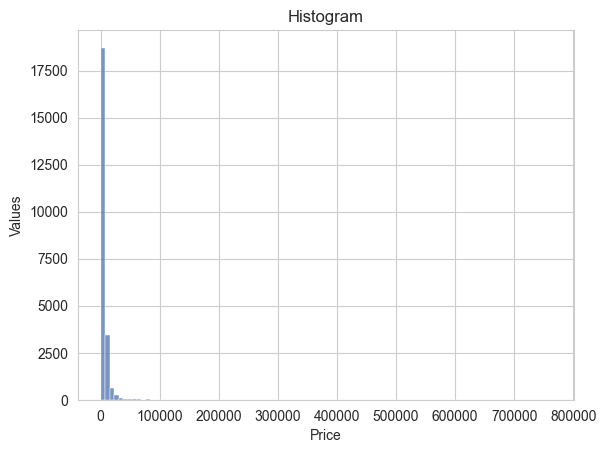

In [109]:
# Выведем гистограмму для last_price
sns.histplot(data['last_price'],  
            color=sns.color_palette('deep')[0], 
            bins=100
)
sns.set_style("whitegrid")
plt.xlabel('Price')
plt.ylabel("Values")
plt.title('Histogram')

Text(0.5, 1.0, 'Box-and-whiskers diagram')

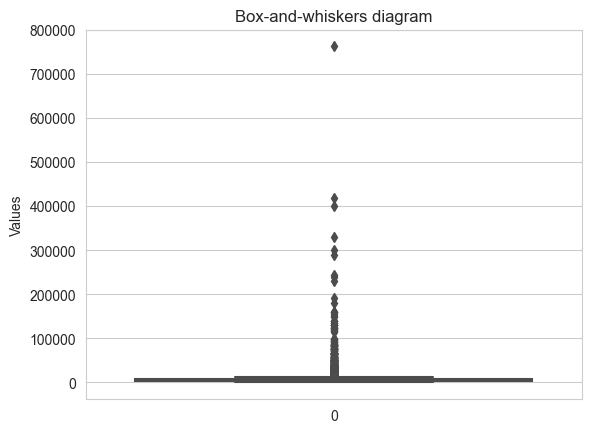

In [110]:
# Выведем диаграмму размаха для last_price
sns.boxplot(data['last_price'],
            color=sns.color_palette('deep')[0])
sns.set_style("whitegrid")
plt.ylabel("Values")
plt.title('Box-and-whiskers diagram')

Средняя стоимость квадратного метра в Ленинградской области в 2019 году составляла около 45 тысяч. Найдем приблизительное минимальное значение цены квартиры с минимальным размером жилья:

In [111]:
min(data['last_price']) * 45

548.55

Оставим в выборке цены на жилье от 550 тысяч. Судя по графику, есть квартиры от 100 млн рублей, исключим их из выборки, так как их не много и они сильно выбиваются из общей выборки:

In [112]:
data = data.query('last_price > 550 and last_price < 100000')

- Рассмотрим значения столбца rooms:

In [113]:
data['rooms'].describe()

count    23274.000000
mean         2.074933
std          1.068715
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [114]:
# Посчитаем, в скольких объявлениях значение комант нулевое
len(data.query('rooms == 0'))

167

Рассмотрим объявления, в которых количество комнат равно нулю:

In [115]:
data.query('rooms == 0')[['studio', 'is_apartment', 'open_plan']].query('studio or is_apartment or open_plan').count()

studio          167
is_apartment    167
open_plan       167
dtype: int64

В тех объявлениях, в которых указано нулевое значение комнат, относятся по типу либо к апартаментам, либо к студии, либо имеют свободную планировку. В данном случае оставим нулевые значения.

In [116]:
data.query('rooms > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,square_meter_price,day_of_week,month,year,type_floor
648,3,17500.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,False,...,NaN,0.0,NaN,306,extra-large,95264.017420,6,7,2018,последний
866,5,25000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,...,NaN,2.0,435.0,418,extra-large,68870.523416,5,12,2017,другой
5358,20,65000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,...,767.0,0.0,NaN,14,extra-large,110169.491525,3,2,2019,другой
9688,8,33000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,False,...,686.0,2.0,66.0,813,extra-large,170015.455951,1,2,2017,другой
14498,6,32250.0,374.6,2018-06-09,19,2.65,5.0,264.5,2,False,...,NaN,2.0,548.0,114,extra-large,86091.831287,5,6,2018,другой
18848,6,28500.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,False,...,516.0,0.0,NaN,1365,extra-large,105555.555556,0,3,2015,последний
20829,6,28659.0,245.4,2016-03-31,14,2.65,4.0,168.3,2,False,...,541.0,2.0,118.0,95,extra-large,116784.841076,3,3,2016,другой


Text(0.5, 1.0, 'Histogram')

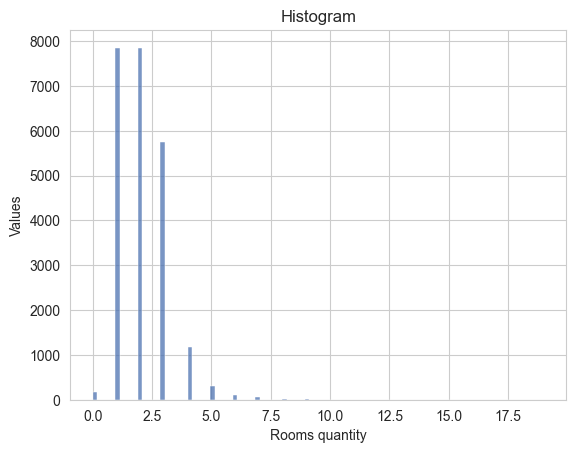

In [117]:
sns.histplot(data['rooms'],  
            color=sns.color_palette('deep')[0], 
            bins=100
)
sns.set_style("whitegrid")
plt.xlabel('Rooms quantity')
plt.ylabel("Values")
plt.title('Histogram')

Также избавимся от объявлений, в которых количество комнат больше 8 (по гистограмме таких значений очень мало):

In [118]:
data = data.query('rooms < 8')

**Вывод:**

**Преобразование данных**
- преобразовали типы данных в столбцах `balcony`, `days_exposition` к целочисленному.
- добавили новые столбцы: цена за квадратный метр, день недели, месяц и год даты публикации
- добавили столбец `type_floor` с категориями 'первый', 'последний', 'другой' в зависимость, на каком этаже расположена квартира
- перевели значения столбца `cityCenters_nearest` из метров в километры

**Удаление аномальных и выбивающихся значений**
- удалили 86 пропущенных значений в столбце `floors_total`
- удалили 205 квартир, в которых сумма площадей кухни и жилой площади превосходит общую площадь
- отесеяли значения столбца last_price до 550 тысяч и от 100 млн
- удалили объявления, в которых количество комнат больше 8

### 4. Проведем исследовательский анализ данных

### 4.1 Изучим следующие столбцы:

- общая площадь

In [119]:
data['total_area'].describe()

count    23246.000000
mean        59.893746
std         32.450689
min         14.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        517.000000
Name: total_area, dtype: float64

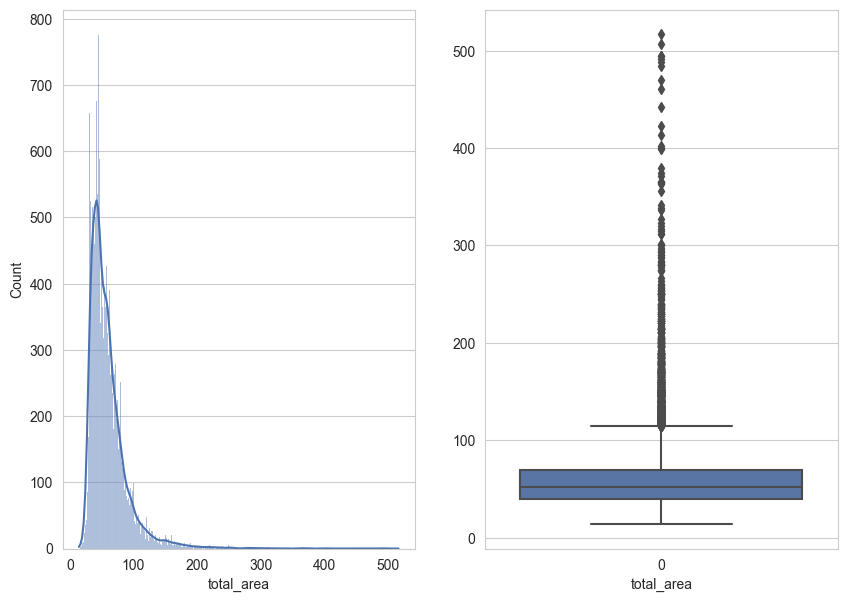

In [120]:
figure_two('total_area', True)

Распределение можно назвать нормальным. При этом судя по диаграмме размаха есть выбросы от 120 метров, а по гистограмме наблюдается "хвост" из квартир с общей площадью от 300 кв.м, их немного, избавимся от них:

In [121]:
data = data.query('total_area < 300')

In [122]:
data['total_area'].value_counts().head(10)

45.0    416
42.0    379
31.0    345
60.0    344
44.0    342
40.0    308
43.0    300
32.0    285
46.0    279
50.0    277
Name: total_area, dtype: int64

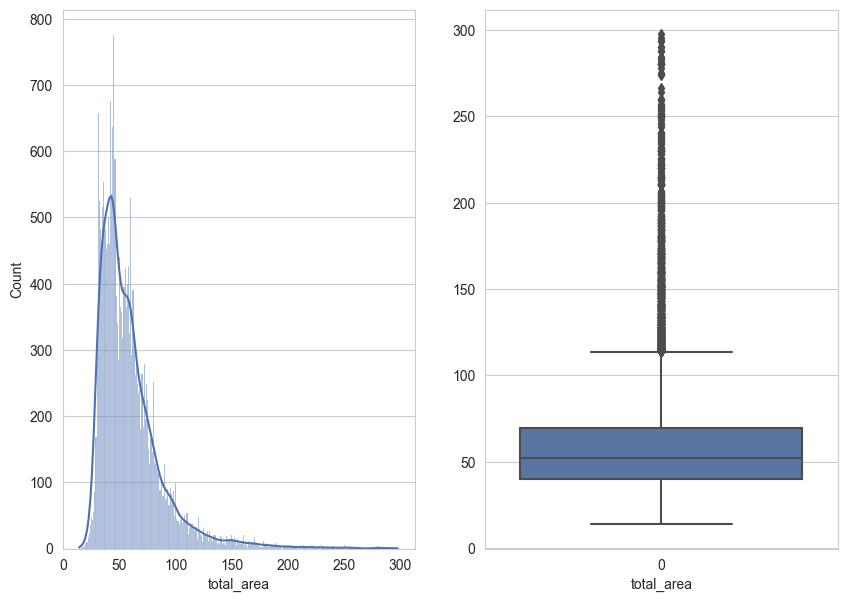

In [123]:
figure_two('total_area', True)

**Вывод: В итоге, остались квартиры с площадью от 14 до 297,5 кв.м, медианное и среднее значения - 52 кв.м и 59 кв.м. соответственно. Квартир от 200 кв.м. немного, цены у таких квартир соответственно высокие. Типичные значения - от 40 до 46 кв.м**

- жилая площадь;

In [124]:
data['living_area'].describe()

count    23209.000000
mean        33.909951
std         19.151826
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        250.000000
Name: living_area, dtype: float64

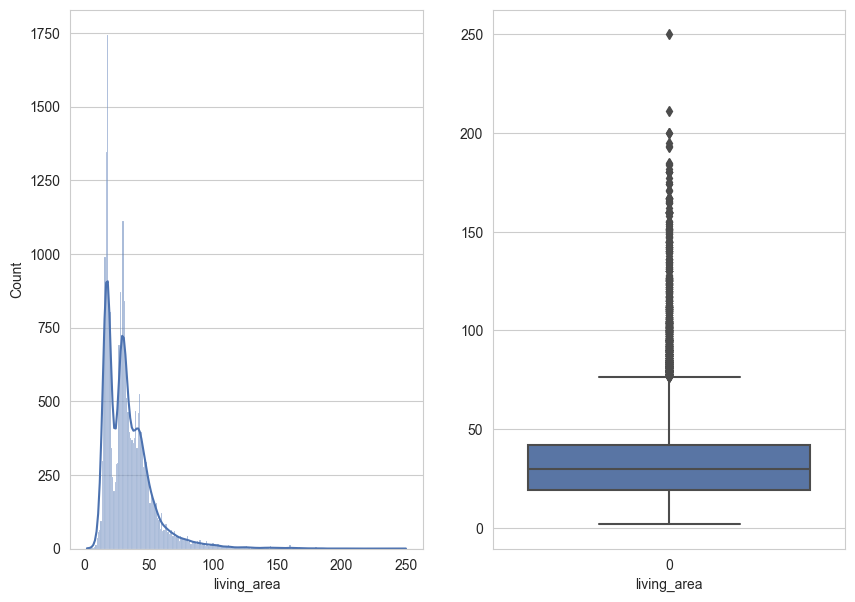

In [125]:
figure_two('living_area', True)

In [126]:
data['living_area'].value_counts().head(10)

18.0    861
17.0    663
30.0    591
16.0    473
20.0    464
28.0    419
31.0    378
19.0    323
29.0    318
32.0    314
Name: living_area, dtype: int64

**Вывод: Выборка не является однородной, распределение похоже на бимодальное. Самое частотное значение в выборке - 18 кв.м. По нормативам 18 кв.м. необходимо на каждого члена семьи из 3 и более человек, а 33 кв.м. - на одного человека. Эти нормативы могут разниться, пики как раз приходятся на значения 16-20 кв.м. и 29-32 кв.м.**

- площадь кухни

In [127]:
data['kitchen_area'].describe()

count    23209.000000
mean        10.309159
std          5.426008
min          0.000000
25%          7.200000
50%          9.000000
75%         11.600000
max        107.000000
Name: kitchen_area, dtype: float64

In [128]:
data['kitchen_area'].value_counts().head(10)

9.0     2271
6.0     1291
10.0    1252
8.0     1097
7.0     1058
11.0     790
8.2      766
12.0     654
15.0     508
8.5      412
Name: kitchen_area, dtype: int64

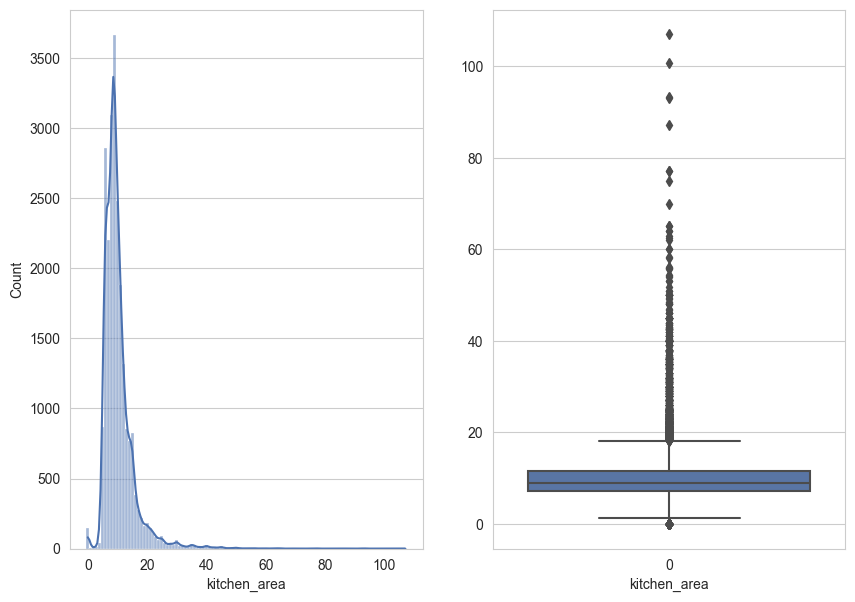

In [129]:
figure_two('kitchen_area', True)

**Вывод: Минимальное значение площади кухни - 0, что подтверждается графиками. Данное значение наблюдается у квартир со свободной планировкой, студий и апартаментов. Типичные значения площади - 6-10 кв.м.**

- цена объекта

In [130]:
data['last_price'].describe()

count    23209.000000
mean      6174.416694
std       6044.151863
min        560.000000
25%       3450.000000
50%       4650.000000
75%       6750.000000
max      99000.000000
Name: last_price, dtype: float64

In [131]:
data['last_price'].value_counts().head(10)

4500.0    338
3500.0    288
4200.0    259
4300.0    257
4000.0    254
3600.0    254
3300.0    239
3800.0    238
3200.0    234
3700.0    231
Name: last_price, dtype: int64

Text(0.5, 1.0, 'Histogram')

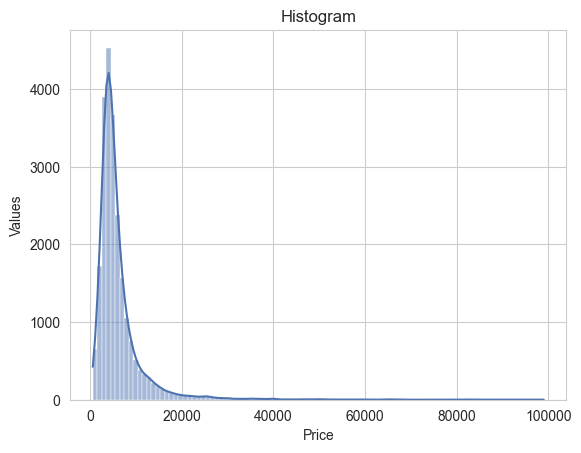

In [132]:
sns.histplot(data['last_price'],  
            color=sns.color_palette('deep')[0], 
            bins=100,
            kde=True
)
sns.set_style("whitegrid")
plt.xlabel('Price')
plt.ylabel("Values")
plt.title('Histogram')

**Вывод: Распределение выборки нормальное. Диапазон значений - от 560 тысяч до 99 миллионов. Наиболее типичные значения - 3,5-4,6 миллиона.**

- количество комнат

In [133]:
data['rooms'].describe()

count    23209.000000
mean         2.059891
std          1.017868
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

In [134]:
data['rooms'].value_counts().head(10).sort_values(ascending=False)

2    7851
1    7838
3    5757
4    1163
5     302
0     166
6      89
7      43
Name: rooms, dtype: int64

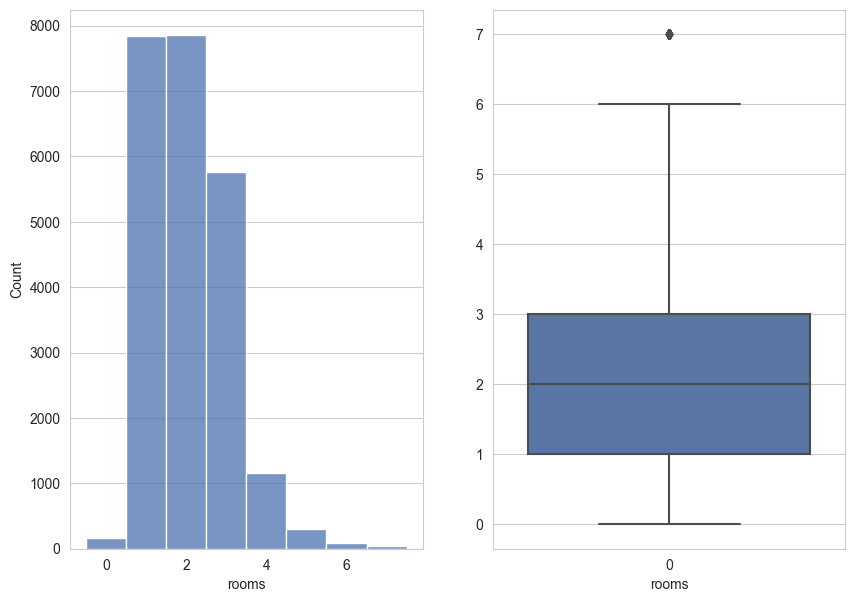

In [135]:
figure_two('rooms', False)

**Вывод: В выборке наиболее часто встречающиеся квартиры - однокомнатные и двухкомнатные - 7838 и 7851 значений соотвественно. Квартир с 4 комнатами значительно меньше, чем 3 комнатами. 5-6-7-комнатных квартир достаточно мало.**

- высота потолков

In [136]:
data['ceiling_height'].describe()

count    23209.000000
mean         2.697223
std          0.241649
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

In [137]:
data['ceiling_height'].value_counts().head(10).sort_values(ascending=False)

2.65    9666
2.50    3490
2.60    1632
2.70    1561
3.00    1094
2.55     977
2.80     971
2.75     895
3.20     271
3.10     201
Name: ceiling_height, dtype: int64

Text(0.5, 1.0, 'Histogram')

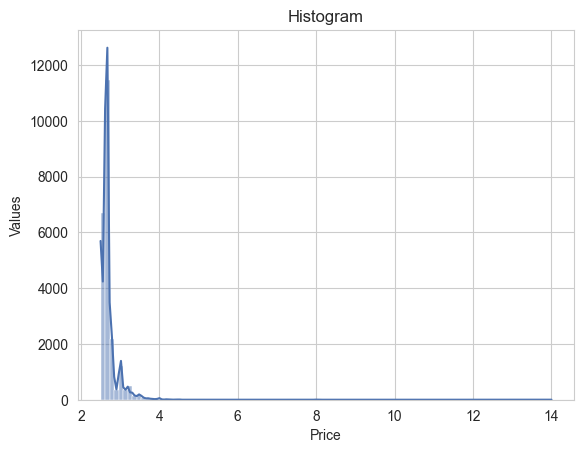

In [138]:
sns.histplot(data['ceiling_height'],  
            color=sns.color_palette('deep')[0], 
            bins=100,
            kde=True
)
sns.set_style("whitegrid")
plt.xlabel('Price')
plt.ylabel("Values")
plt.title('Histogram')

**Вывод: Диапазон значений потолков - от 2,5 до 14 метров. Медианное значение и самое частотное значение - 2.65 метров. Также достаточно много квартир с высотой потолка 2,5-2,7 метров.**

- этаж квартиры

In [139]:
data['floor'].describe()

count    23209.000000
mean         5.864018
std          4.854851
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [140]:
data['floor'].value_counts().head(10).sort_values(ascending=False)

2     3318
3     3013
1     2858
4     2758
5     2581
6     1270
7     1194
8     1054
9     1034
10     674
Name: floor, dtype: int64

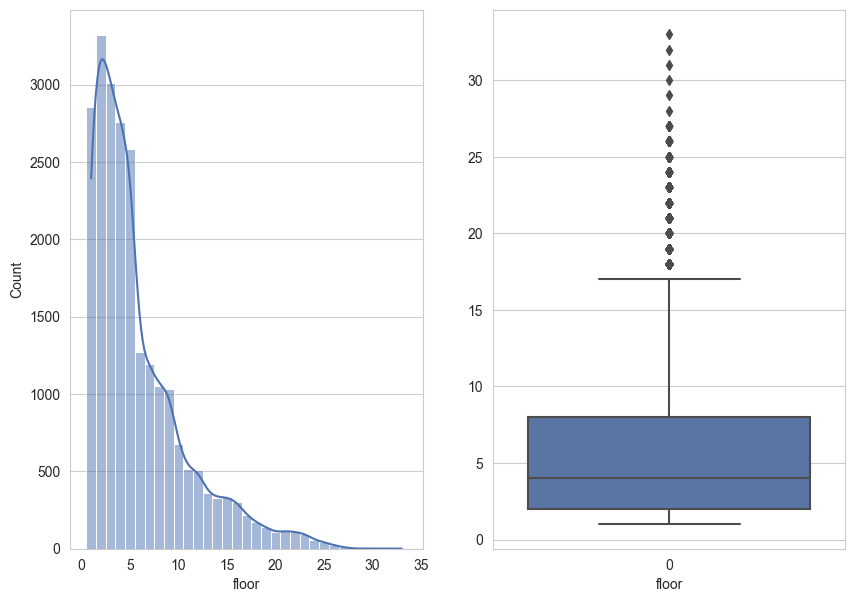

In [141]:
figure_two('floor', True)

**Вывод: Диапазон этажей - от 1 до 33. Больше всего квартир, которые располагаются на 1-5 этажах. Квартир на этажах от 10 намного меньше. Скорее всего причина в том, что в Санкт-Петербурге не так много высотных зданий, а выборка состоит примерно на 70% на объявлениях именно из Санкт-Петербурга.**

- тип этажа квартиры («первый», «последний», «другой»)

In [142]:
data['type_floor'].value_counts().head(10).sort_values(ascending=False).reset_index()

,index,type_floor
0,другой,17102
1,последний,3249
2,первый,2858


Text(0.5, 1.0, 'Histogram')

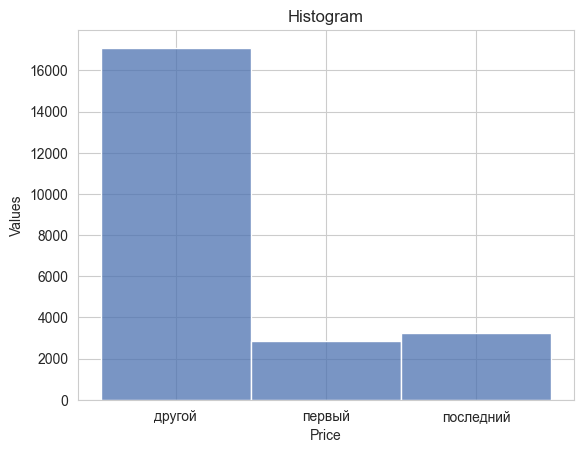

In [143]:
sns.histplot(data['type_floor'],  
            color=sns.color_palette('deep')[0], 
            bins=100
)
sns.set_style("whitegrid")
plt.xlabel('Price')
plt.ylabel("Values")
plt.title('Histogram')

**Вывод: Больше всего квартир на "других" этажах - целых 17102. В выборке большая часть квартир располагается на 1-5 этажах, из них большая часть относится именно к категории "другие". Квартир на последнем этаже чуть больше - 3249, чем квартир на первом - 2858.**

- общее количество этажей в доме 

In [144]:
data['floors_total'].describe()

count    23209.000000
mean        10.662803
std          6.573738
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [145]:
data['floors_total'].value_counts().head(10).sort_values(ascending=False)

5.0     5723
9.0     3730
16.0    1353
12.0    1348
4.0     1177
10.0    1166
25.0    1044
6.0      881
17.0     825
3.0      644
Name: floors_total, dtype: int64

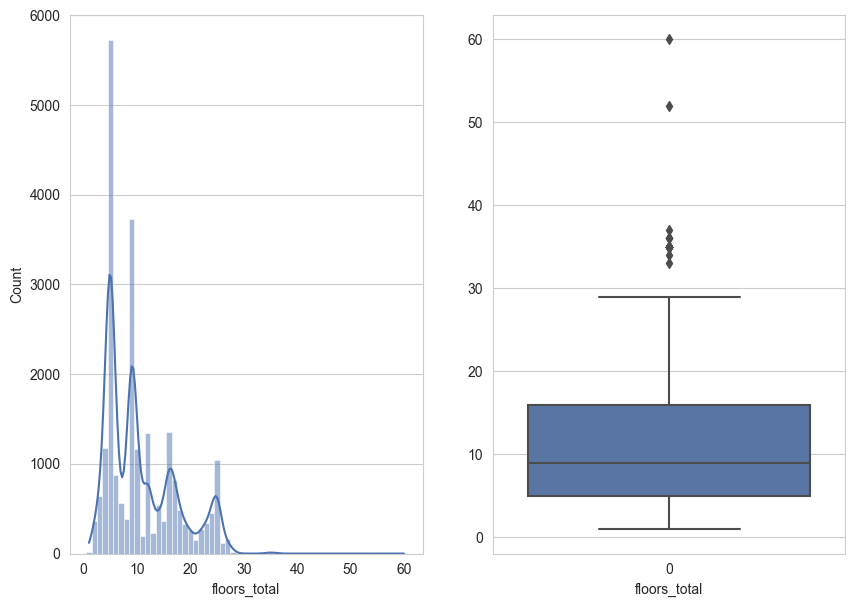

In [146]:
figure_two('floors_total', True)

**Вывод: В выборке наблюдается этажность от 1 до 60. Медианное значение - 9 этажей.**

**Распределение неоднородно, наблюдется несколько пиков. Больше всего пятиэтажных домов, чуть меньше девятиэтажных. Гораздо меньше домов от 30 этажей.**

- расстояние до центра города в метрах 

In [147]:
data['cityCenters_nearest'].describe()

count    17838.000000
mean        14.232425
std          8.628323
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64

In [148]:
data['cityCenters_nearest'].value_counts().head(10).sort_values(ascending=False)

12.0    1578
15.0    1540
13.0    1431
14.0    1264
16.0    1251
11.0    1167
17.0     898
5.0      884
10.0     711
4.0      684
Name: cityCenters_nearest, dtype: int64

In [149]:
data.head()['cityCenters_nearest']

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: cityCenters_nearest, dtype: float64

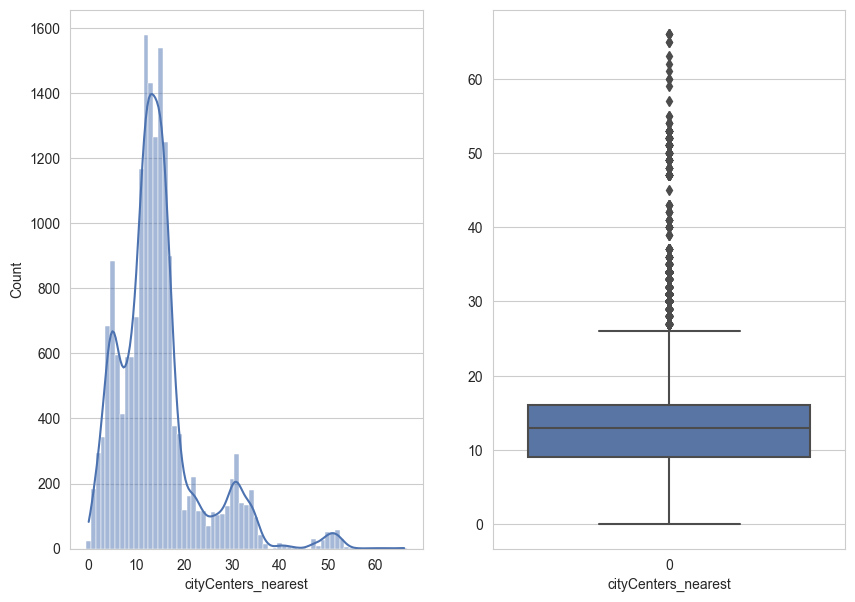

In [150]:
figure_two('cityCenters_nearest', True)

**Вывод: Квартиры расположены в 0-66 километрах от центра. Скорее всего, квартиры с нулевым значением, располагаются в пределах 1 км к центру. Чаще всего квартиры располагаются в 11-16 км от центра.**

- расстояние до ближайшего аэропорта

In [151]:
data['airports_nearest'].describe()

count    17817.000000
mean     28821.836561
std      12656.488840
min          0.000000
25%      18551.000000
50%      26770.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [152]:
data['airports_nearest'].value_counts().head(10).sort_values(ascending=False)

37434.0    61
21928.0    32
39946.0    30
44870.0    30
37407.0    27
39140.0    26
18732.0    26
31744.0    25
37412.0    24
19499.0    23
Name: airports_nearest, dtype: int64

In [153]:
data.query('airports_nearest == 0')['airports_nearest'].count()

1

Text(0.5, 1.0, 'Histogram')

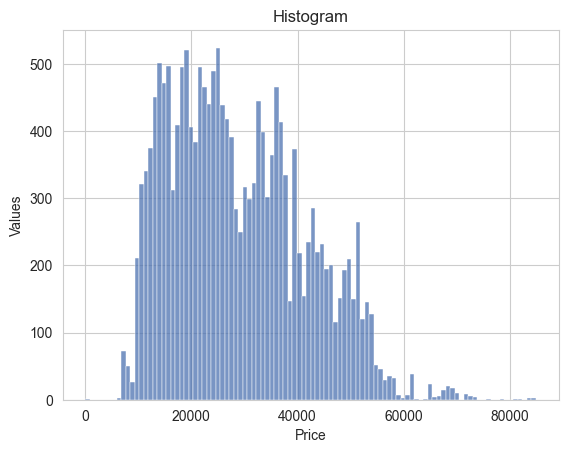

In [154]:
sns.histplot(data['airports_nearest'],  
            color=sns.color_palette('deep')[0], 
            bins=100
)
sns.set_style("whitegrid")
plt.xlabel('Price')
plt.ylabel("Values")
plt.title('Histogram')

**Вывод: Квартиры расположены в 0-85 километрах от аэропорта. Скорее всего, квартира с нулевым значением располагается в аэропорту. Медианное значение - 26,7 км.**

- расстояние до ближайшего парка

In [155]:
data['parks_nearest'].describe()

count    7904.000000
mean      491.117915
std       341.473329
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [156]:
data['parks_nearest'].value_counts().head(10).sort_values(ascending=False)

441.0     67
392.0     41
456.0     40
173.0     40
2102.0    30
471.0     30
458.0     29
485.0     28
541.0     28
288.0     28
Name: parks_nearest, dtype: int64

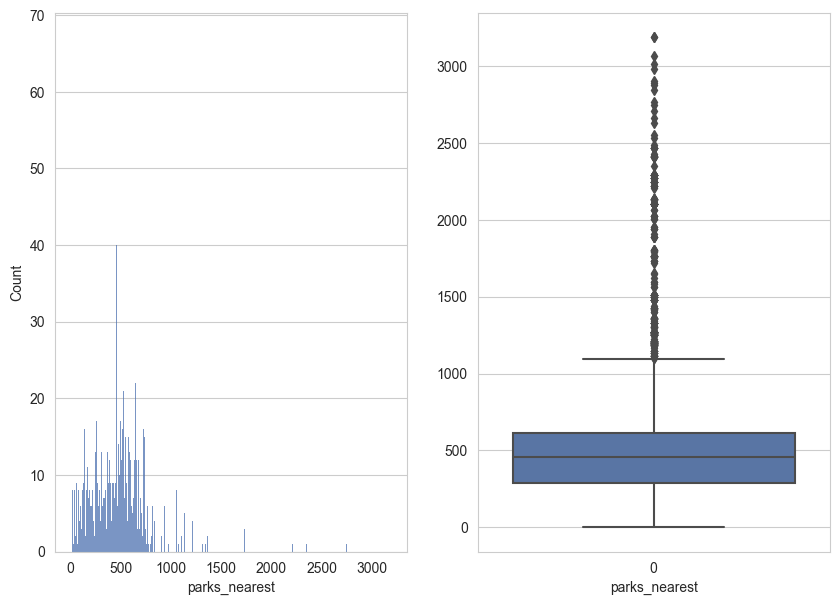

In [157]:
figure_two('parks_nearest', False)

**Вывод: Парки расположены в 1-3190 метрах от квартир. Медианное значение - 455 метров.**

- день публикации объявления

In [158]:
data['day_of_week'].describe()

count    23209.000000
mean         2.566763
std          1.787471
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_week, dtype: float64

In [159]:
data['day_of_week'].value_counts().sort_values(ascending=False)

3    4202
1    4100
4    3939
2    3893
0    3541
5    1880
6    1654
Name: day_of_week, dtype: int64

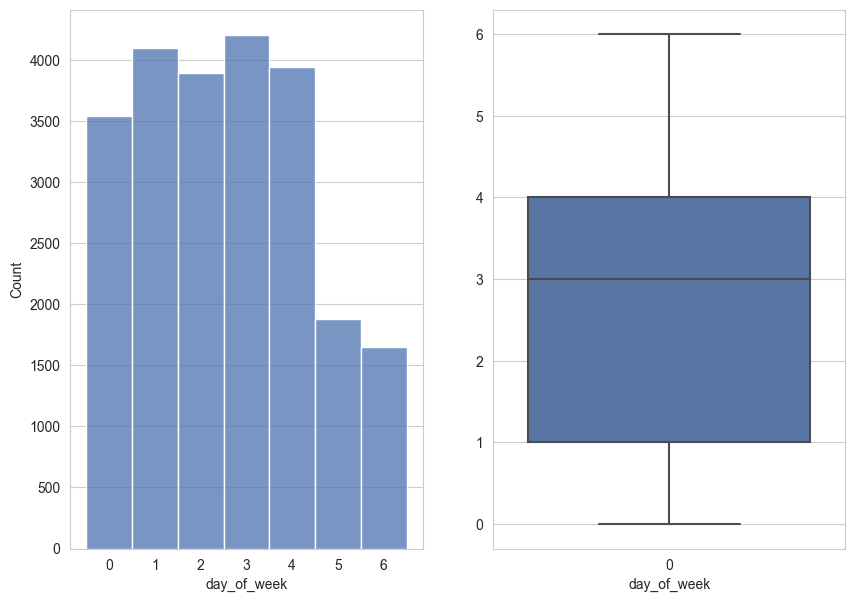

In [160]:
figure_two('day_of_week', False)

**Вывод: Чаще всего публикации о продаже происходят в четверг, чуть реже во вторник. В субботу и воскресенье публикаций намного меньше, чем в будние дни. Похоже, что в выходные дни активность пользователей снижается.**

- месяц публикации объявления

In [161]:
data['month'].describe()

count    23209.000000
mean         6.399845
std          3.494292
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

In [162]:
data['month'].value_counts().sort_values(ascending=False)

2     2595
3     2536
11    2329
4     2317
10    2073
9     1941
6     1727
8     1715
7     1648
12    1612
1     1473
5     1243
Name: month, dtype: int64

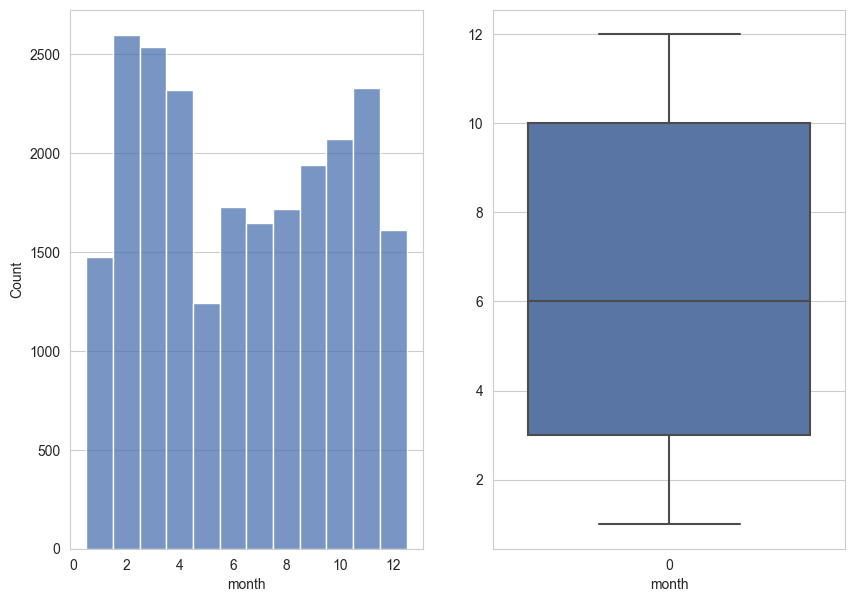

In [163]:
figure_two('month', False)

**Вывод: Чаще всего публикации о продаже происходят в феврале, марте и апреле. Меньше всего публикаций отмечается в январе, мае и декабре. Получается, что существует некая сезонность для продаж квартир: с февраля по апрель и с сентября по ноябрь - самая высокая активность.**

### 4.2 Изучим, как быстро продавались квартиры (столбец days_exposition)

In [164]:
data['days_exposition'].describe()

count    23209.000000
mean       186.121332
std        233.582384
min          0.000000
25%         43.000000
50%         95.000000
75%        238.000000
max       1618.000000
Name: days_exposition, dtype: float64

In [165]:
data['days_exposition'].value_counts().head(10).sort_values(ascending=False)

45    888
60    552
7     260
30    230
4     208
90    198
3     177
11    173
9     171
15    166
Name: days_exposition, dtype: int64

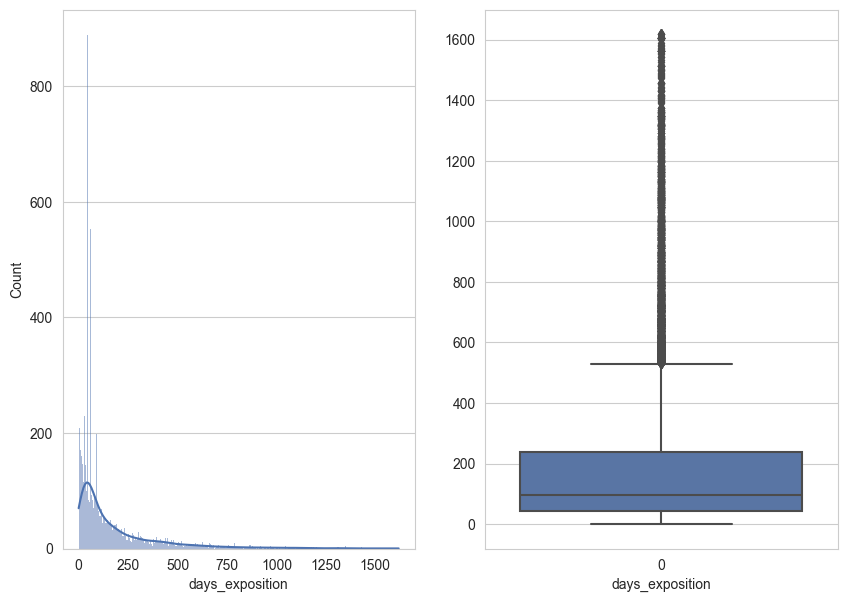

In [166]:
figure_two('days_exposition', True)

Квартиры продавались от 0 до 1618 дней. Медианное и среднее значение составляет 95 и 186 соотвественно. Как отмечали выше, наиболее часто встречающиеся значения выпали на 45 (1,5 месяца), 60 (месяц), 7 (неделя), 30 (месяц), 90 дней (три месяца). Возможно, что существует функция, которая может снимать публикации после определенного времени. Если это так, то достаточно сложно разделить квартиры, которые действительно продались в эти дни и которые были сняты автоматически. Попробуем убрать эти дни из выборки и посмотрим как изменились характеристики (также не будем включать нулевые значения - возможно, что такие квартиры либо продались в тот же день, либо сами авторы удалили свою публикацию):

In [167]:
data.query('days_exposition != [45, 60, 7, 30, 90, 0]')['days_exposition'].describe()

count    21061.000000
mean       200.373676
std        240.590442
min          1.000000
25%         43.000000
50%        112.000000
75%        263.000000
max       1618.000000
Name: days_exposition, dtype: float64

In [168]:
data.query('days_exposition != [45, 60, 7, 30, 90, 0]')['days_exposition'].value_counts().head(10).sort_values(ascending=False)

4     208
3     177
11    173
9     171
15    166
5     165
14    161
18    160
8     159
29    155
Name: days_exposition, dtype: int64

Text(0.5, 1.0, 'Histogram')

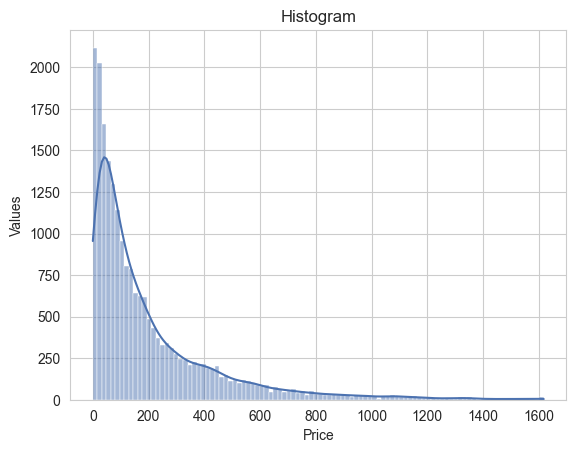

In [169]:
sns.histplot(data.query('days_exposition != [45, 60, 7, 30, 90]')['days_exposition'],  
            color=sns.color_palette('deep')[0], 
            bins=100,
             kde=True
)
sns.set_style("whitegrid")
plt.xlabel('Price')
plt.ylabel("Values")
plt.title('Histogram')

Распределение стало больше похожена распределение Пуассона. Удалять публикации с днями 45 (1,5 месяца), 60 (месяц), 7 (неделя), 30 (месяц), 90 дней (три месяца) не будем, так как неизвестно, как отделить  квартиры, которые действительно продались в эти дни и которые были сняты автоматически. При этом, удаляя данные значения, можно исказить данные в целом. Необходимо запросить дополнительную информацию о природе значений данного столбца.

Text(0.5, 1.0, 'Box-and-whiskers diagram')

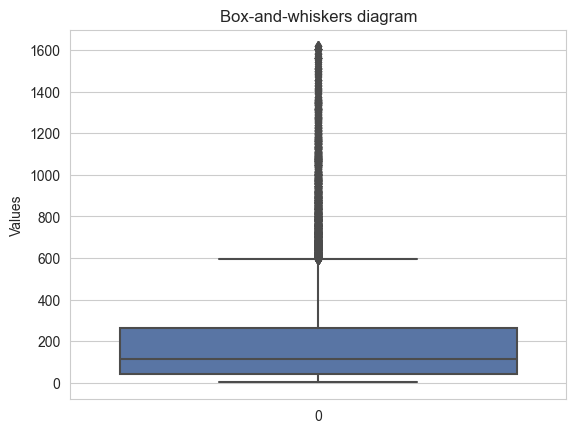

In [170]:
sns.boxplot(data.query('days_exposition != [45, 60, 7, 30, 90, 0]')['days_exposition'],
            color=sns.color_palette('deep')[0])
sns.set_style("whitegrid")
plt.ylabel("Values")
plt.title('Box-and-whiskers diagram')

Среднее значение после фильтрации составляет 200 дней, медианное значение - 112 дней. Данные значения сильно отличаются из-за того, что очень много значений лежит от 1000 дней и это влияет на величину среднего.

Определим, какие продажи можно отнести к быстрым и долгим.

Исходя из диаграммы размаха, наблюдаются выбросы выше значения верхней границы. Найдем значение вехней границы:

In [171]:
data.query('days_exposition != [45, 60, 7, 30, 90, 0]')['days_exposition'].quantile(0.75) + \
1.5 * (data.query('days_exposition != [45, 60, 7, 30, 90, 0]')['days_exposition'].quantile(0.75) \
- data.query('days_exposition != [45, 60, 7, 30, 90, 0]')['days_exposition'].quantile(0.25)) 

593.0

In [208]:
# Посчитаем, сколько всего публикаций было продано более чем за 593 дня
data.query('days_exposition > 593')['days_exposition'].count()

1499

1499 объявления продавались более чем за 593 дня. Будем считать, что все, что находится выше данного значения, относится к долгим продажам, то есть публикации от 593 дней можно назвать необычно долгими.

### 4.3 Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта

In [173]:
data.corr()['last_price'].sort_values(ascending=False)

C:\Users\Acer\AppData\Local\Temp\ipykernel_1492\3429993785.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['last_price'].sort_values(ascending=False)


last_price             1.000000
total_area             0.753186
square_meter_price     0.743440
living_area            0.662271
kitchen_area           0.577649
rooms                  0.452790
ceiling_height         0.339681
ponds_around3000       0.210175
parks_around3000       0.209693
days_exposition        0.152075
total_images           0.133650
floor                  0.042745
is_apartment           0.034645
floors_total           0.019834
balcony                0.017968
month                  0.008428
day_of_week           -0.005688
open_plan             -0.012111
parks_nearest         -0.012128
airports_nearest      -0.034917
studio                -0.040817
year                  -0.055645
ponds_nearest         -0.120295
cityCenters_nearest   -0.305531
Name: last_price, dtype: float64

**Выраженная корреляция наблюдается наблюдается у цены и столбцов total_area(общая площадь), square_meter_price(цена за квадратный метр), living_area(жилая площадь), kitchen_area(площадь кухни), rooms(количество комнат)**

- Зависимость цены от общей площади:

In [174]:
data['last_price'].corr(data['total_area'])

0.7531857493978453

Text(0.5, 1.0, 'Scatter plot')

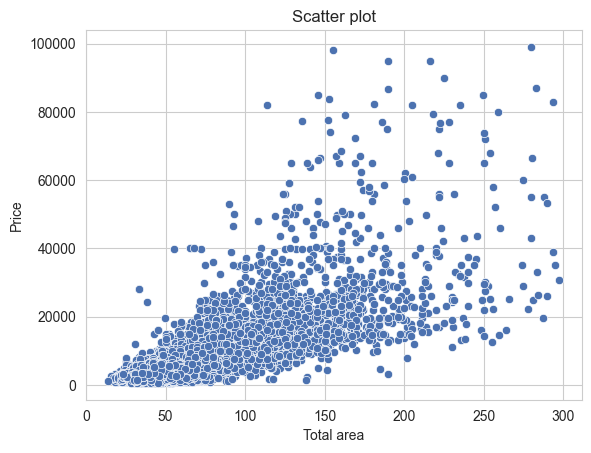

In [175]:
sns.scatterplot(data=data, x='total_area', y='last_price', color=sns.color_palette('deep')[0])
sns.set_style("whitegrid")
plt.xlabel('Total area')
plt.ylabel("Price")
plt.title('Scatter plot')

Коэффициент корреляции между значениями цены и общей площади составляет 0,75. До значения общей площади 150 кв.м. наблюдается сильная корреляция, после 150 кв.м. отклонение становится больше.

- Зависимость цены от жилой площади

In [176]:
data['last_price'].corr(data['living_area'])

0.6622707209312713

Text(0.5, 1.0, 'Scatter plot')

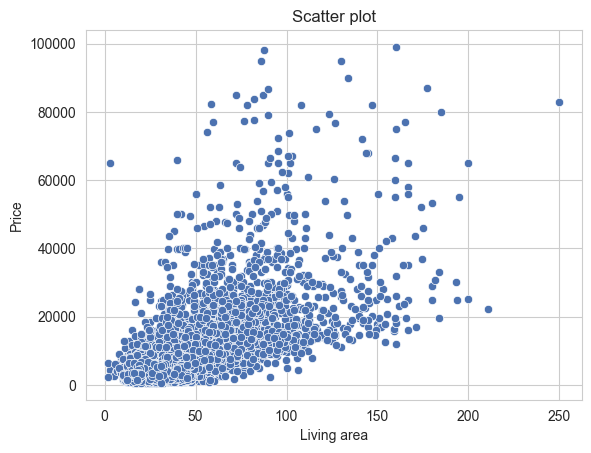

In [177]:
sns.scatterplot(data=data, x='living_area', y='last_price', color=sns.color_palette('deep')[0])
sns.set_style("whitegrid")
plt.xlabel('Living area')
plt.ylabel("Price")
plt.title('Scatter plot')

Коэффициент корреляции между значениями цены и жилой площади составляет 0,66. До значения площади 100 кв.м. наблюдается сильная корреляция, после 100 кв.м. разброс значений становится больше.

- Зависимость цены от площади кухни:

In [178]:
data['last_price'].corr(data['kitchen_area'])

0.5776487106972558

Text(0.5, 1.0, 'Scatter plot')

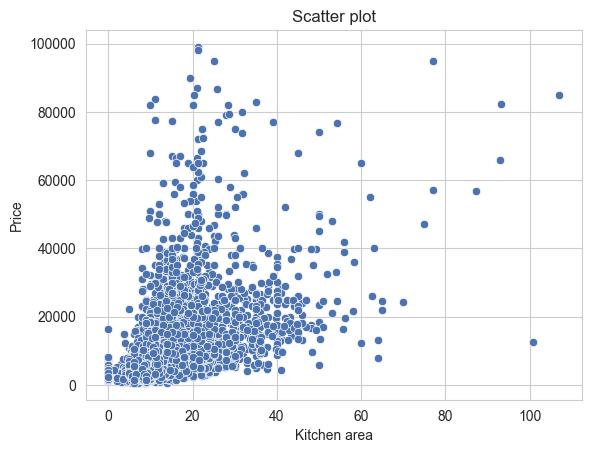

In [179]:
sns.scatterplot(data=data, x='kitchen_area', y='last_price', color=sns.color_palette('deep')[0])
sns.set_style("whitegrid")
plt.xlabel('Kitchen area')
plt.ylabel("Price")
plt.title('Scatter plot')

Коэффициент корреляции между значениями цены и площади кухни составляет 0,58. Достаточно много квартир с кухнями около 20 кв метров в широком ценовом диапазоне.

- Зависимость цены от количества комнат

In [180]:
data['last_price'].corr(data['rooms'])

0.4527900107657463

In [217]:
rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='median')
rooms.columns = ['median']
rooms = rooms.reset_index()
print(rooms)

   rooms   median
0      0   2725.0
1      1   3600.0
2      2   4750.0
3      3   6200.0
4      4   8990.0
5      5  13250.0
6      6  17500.0
7      7  22000.0


Text(0.5, 1.0, 'Bar plot')

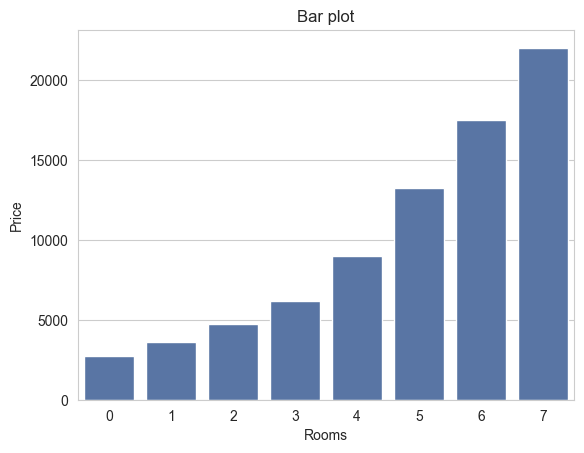

In [182]:
sns.barplot(data=rooms, x='rooms', y='median', color=sns.color_palette('deep')[0])
sns.set_style("whitegrid")
plt.xlabel('Rooms')
plt.ylabel("Price")
plt.title('Bar plot')

Коэффициент корреляции между значениями цены и площади кухни составляет 0,45. С Увеличением количества комнат, цена повышается.

- Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)

In [214]:
floors = data.pivot_table(index='type_floor', values='last_price', aggfunc='median')
floors.columns = ['median']
floors = floors.reset_index()
print(floors)

  type_floor  median
0     другой  4850.0
1     первый  3900.0
2  последний  4300.0


Text(0.5, 1.0, 'Bar plot')

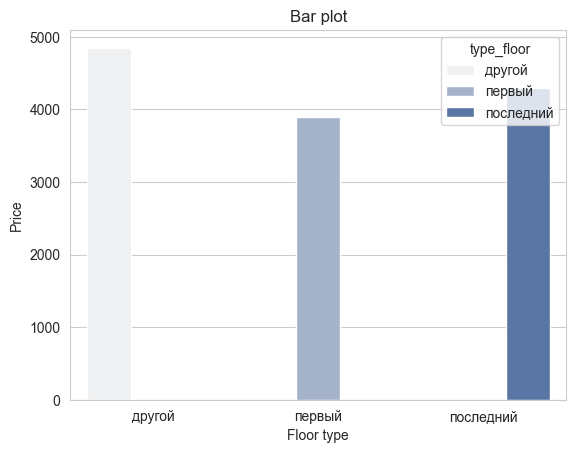

In [184]:
sns.barplot(data=floors, x='type_floor', y='median', hue='type_floor', color=sns.color_palette('deep')[0])
sns.set_style("whitegrid")
plt.xlabel('Floor type')
plt.ylabel("Price")
plt.title('Bar plot')

Цены на квартиры на 1 этаже ниже, чем на последних этажах. Наибольшая цена - у квартир, которые расположены между первым и последним этажом.

- Зависимость цены от даты размещения (день недели)

In [216]:
week = data.pivot_table(index='day_of_week', values='last_price', aggfunc='median')
week.columns = ['median']
week = week.reset_index()
print(week)

   day_of_week  median
0            0  4650.0
1            1  4750.0
2            2  4700.0
3            3  4650.0
4            4  4590.0
5            5  4550.0
6            6  4550.0


Text(0.5, 1.0, 'Line plot')

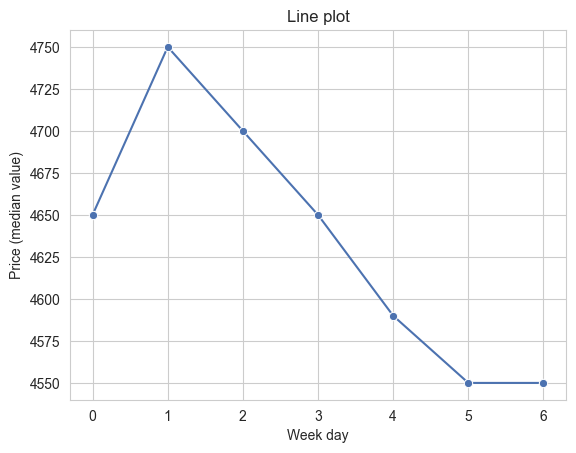

In [202]:
sns.lineplot(data=week, x='day_of_week', y='median', color=sns.color_palette('deep')[0], marker="o")
sns.set_style("whitegrid")
plt.xlabel('Week day')
plt.ylabel("Price (median value)")
plt.title('Line plot')

Резкий скачок цен наблюдается с понедельника на вторник. Со вторника по субботу цена уменьшается. Цены в субботу и воскресенье близки по значению. В субботу и воскресенье активность небольшая, публикаций меньше, поэтому и значение цены соотвественно ниже, чем в остальные дни.

- Зависимость цены от даты размещения (месяц)

In [187]:
month = data.pivot_table(index='month', values='last_price', aggfunc='median')
month.columns = ['median']
month = month.reset_index()

Text(0.5, 1.0, 'Line plot')

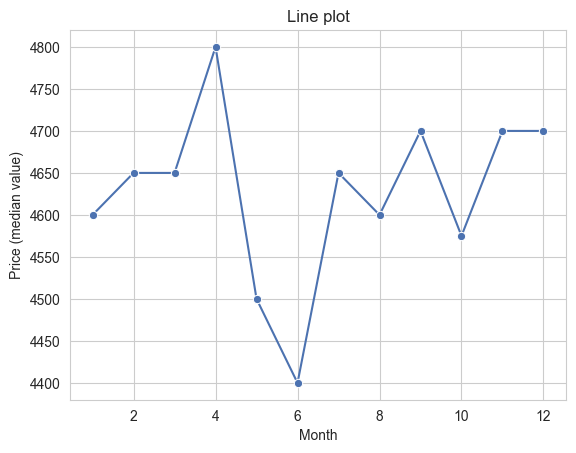

In [201]:
sns.lineplot(data=month, x='month', y='median', color=sns.color_palette('deep')[0], marker="o")
sns.set_style("whitegrid")
plt.xlabel('Month')
plt.ylabel("Price (median value)")
plt.title('Line plot')

Наибольшая цена наблюдается в апреле, после апреля до июня происходит резкое уменьшение показателя. Как отмечали выше, с февраля по апрель и с сентября по ноябрь - самая высокая активность пользоваталей. Видимо, высокая активность пользователей увеличивает число публикаций и, соттветственно, значение цены в этот месяц.

- Зависимость цены от даты размещения (год)

In [215]:
year = data.pivot_table(index='year', values='last_price', aggfunc='median')
year.columns = ['median']
year = year.reset_index()
print(year)

   year  median
0  2014  8118.5
1  2015  5300.0
2  2016  4550.0
3  2017  4500.0
4  2018  4590.0
5  2019  5089.5


Text(0.5, 1.0, 'Line plot')

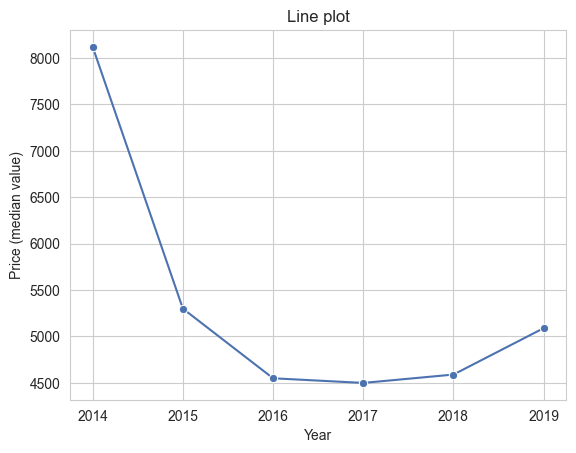

In [199]:
sns.lineplot(data=year, x='year', y='median', color=sns.color_palette('deep')[0], marker="o")
sns.set_style("whitegrid")
plt.xlabel('Year')
plt.ylabel("Price (median value)")
plt.title('Line plot')

С 2014 по 2016 цена непрерывно снижалась достаточно резко (за это время произошло снижение почти в 2 раза). Предположим, что это может быть связано с экономическим кризисом 2014 года - вследствие этого произошло сокращение спроса, снижение темпов строительства и т.д. С наступлением 2017 года ситуация стабилизировалась, цена стала повышаться вплоть до 2019 года.

**Вывод:**
**Наибольшая корреляция цены выявлена со значениями общей площади, жилой площади, площади кухни и количеством комнат с коэффициентами корреляции 0.75, 0.66, 0.58, 0.45 соответственно. Чем выше значения данных столбцов, тем цена выше.**

**Цены на квартиры на 1 этаже ниже, чем на последних этажах. Наибольшая цена - у квартир, которые расположены между первым и последним этажом.**

**Цена также зависит от:**
- `дня недели`. Наблюдается зависимость между активностью пользователями и ценой: резкий скачок цен  с понедельника на вторник. Цены в субботу и воскресенье близки по значению. В субботу и воскресенье активность небольшая, публикаций меньше, поэтому и значение цены соотвественно ниже, чем в остальные дни.
- `месяца`. Наибольшая цена наблюдается в апреле, после апреля до июня происходит резкое уменьшение показателя цены. Здесь также немаловажную роль играет активность пользоваталей. Видимо, высокая активность пользователей увеличивает число публикаций и, соответственно, значение цены в этот месяц.
- `года`. С 2014 по 2016 года наблюдалось резкое снижение цены вдвое, с 2017 по 2019 год цена стала увеличиваться, практически достигнув значения 2015 года. Причина - экономическая ситуация на мировом рынке.

### 4.4 Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [191]:
locality_top = data.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'mean'])
locality_top.columns = ['total', 'mean']
locality_top = locality_top.sort_values(by='total', ascending=False).head(10).reset_index()
locality_top['mean'] = round(locality_top['mean'], 2)

In [192]:
locality_top.sort_values(by='mean')

,locality_name,total,mean
9,выборг,234,58303.71
4,всеволожск,390,68619.63
8,гатчина,303,68625.14
6,колпино,335,75295.34
3,поселок шушары,435,78359.88
1,мурино,557,85548.71
7,поселок парголово,326,90135.08
2,кудрово,447,94979.75
5,пушкин,366,103185.75
0,санкт-петербург,15396,113382.86


**Из населенных пунктов с наибольшим число объявлений самая `высокая` стоимость квадратного метра в Санкт-Петербурге - 113 383.**

**Из населенных пунктов с наибольшим число объявлений самая `низкая` стоимость квадратного метра в Выборге - 58 304.**

### 4.5 Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.

In [193]:
data.query('locality_name == "санкт-петербург"').pivot_table(index='cityCenters_nearest', values='last_price') \
.sort_values(by='last_price', ascending=False)

,last_price
cityCenters_nearest,
0.0,25505.255333
1.0,15804.541431
2.0,14446.891429
7.0,13806.655588
6.0,13019.562555
5.0,12354.111356
4.0,11310.663189
3.0,10661.622730
8.0,9133.513049


Text(0.5, 1.0, 'Line plot')

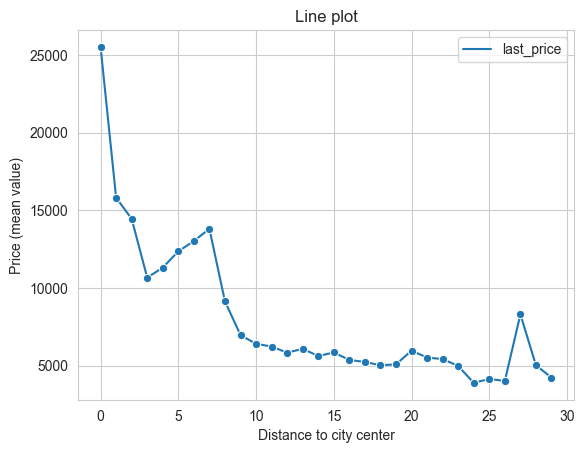

In [203]:
sns.lineplot(data.query('locality_name == "санкт-петербург"').pivot_table(index='cityCenters_nearest', values='last_price'),
             color=sns.color_palette('deep')[0], 
             marker='o')
sns.set_style('whitegrid')
plt.xlabel('Distance to city center')
plt.ylabel('Price (mean value)')
plt.title('Line plot')

**Пиковое значение наблюдается в самом центре, в диапазоне от 0 до 1 км. Примерно от 7 км до 26 км цена имеет тенденцию к снижению. Также присутствуют выбивающиеся пиковые значения на расстоянии 7 и 27 км. Можно объяснить тем, что на расстоянии в 7 км располагаются много квартир с высокой ценой за 1 кв.м. - могли повлиять такие факторы, как удачное местоположение, хорошая инфраструктура, близость к метро и тд. Рассмотрим срез данных со значением в 27 км:**

In [195]:
data.query('cityCenters_nearest == 27 & locality_name == "санкт-петербург"').sort_values(by='last_price', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,square_meter_price,day_of_week,month,year,type_floor
748,13,14350.0,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,...,1496.0,0.0,NaN,128,medium,193918.918919,1,11,2017,другой
5961,6,2250.0,32.0,2018-02-27,1,2.65,2.0,16.5,2,False,...,NaN,0.0,NaN,178,small,70312.500000,1,2,2018,последний


На расстоянии в 27 км от центра всего две квартиры, но цена одной из них (14,4 млн) значительно больше второй, что приводит к большому значению средней цены и к пику на графике.

### 5. Общий вывод

Было проведено исследование данных сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

1. В связи с большим количеством пропущенных значений были заполнены следующие столбцы: ceiling_height (высота потолков (м)) floors_total (всего этажей в доме), living_area (жилая площадь в квадратных метрах (м²)). is_apartment (апартаменты),  kitchen_area (площадь кухни в квадратных метрах (м²)), balcony (число балконов), locality_name (название населённого пункта) и days_exposition (сколько дней было размещено объявление (от публикации до снятия)). В столцах airports_nearest (расстояние до ближайшего аэропорта в метрах (м)), cityCenters_nearest (расстояние до центра города (м)), parks_around3000 (число парков в радиусе 3 км), parks_nearest (расстояние до ближайшего парка (м)), ponds_around3000 (число водоёмов в радиусе 3 км), ponds_nearest (расстояние до ближайшего водоёма (м)) - оставили пропущенные значения, так как  скорее всего они вызваны технической ошибкой.


2. Преобразовали типы данных в столбцах balcony, days_exposition к целочисленному; добавили новые столбцы - цена за квадратный метр, день недели, месяц и год даты публикации, тип этажа; перевели значения столбца cityCenters_nearest из метров в километры; удалили выбивающиеся значения last_price (до 550 тысяч и от 100 млн), rooms(количество комнат больше 8), также удалили 205 объявлений, в которых сумма площадей кухни и жилой площади превосходит общую площадь. В столбце floors_total (общее количество этажей) удалили 86 пропущенных значений.


3. В столбце days_exposition() самые частотные значения - 45 (1,5 месяца), 60 (месяц), 7 (неделя), 30 (месяц), 90 дней (три месяца). Возможно, что существует функция, которая может снимать/архивировать публикации после определенного количества времени. По диаграмме размаха определили, что необычно долгими публикацими можно считать те, которые "висят" более 593 дней.


4. Нашли зависимости стоимость квартир от различных факторов:
- Наибольшая корреляция цены выявлена со значениями общей площади, жилой площади, площади кухни и количеством комнат с коэффициентами корреляции 0.75, 0.66, 0.58, 0.45 соответственно. Чем выше значения данных столбцов, тем цена выше.
- Цены на квартиры на 1 этаже ниже, чем на последних этажах. Наибольшая цена - у квартир, которые расположены между первым и последним этажом.
- Наблюдается зависимость между активностью пользователями и ценой: резкий скачок цен с понедельника на вторник. В субботу и воскресенье активность небольшая, публикаций меньше, поэтому и значение цены соотвественно ниже, чем в остальные дни. В целом, в будние дни цена выше, чем в выходные.
- Наибольшая цена наблюдается в апреле, после апреля до июня происходит резкое уменьшение показателя цены. Здесь также немаловажную роль играет активность пользоваталей. Видимо, высокая активность пользователей увеличивает число публикаций и, соответственно, значение цены в этот месяц.
- С 2014 по 2016 года наблюдалось резкое снижение цены вдвое (c 8,118.5 до 4,450 млн), с 2017 по 2019 год цена стала увеличиваться, практически достигнув значения 2015 года. Причина в резком падении цен с 2014 - экономическая ситуация на мировом рынке.
 
 
5. Стоимость объектов ближе к центру Санкт-Петербурга увеличивается, самая большая стоимость - в пределах одного километра и на расстоянии в 7 км. Самая высокая стоимость квадратного метра - в Санкт Перербурге.


Рекомендации:
- Устранить техническую ошибку, при которой в столбцах airports_nearest (расстояние до ближайшего аэропорта в метрах (м)), cityCenters_nearest (расстояние до центра города (м)), parks_around3000 (число парков в радиусе 3 км), parks_nearest (расстояние до ближайшего парка (м)), ponds_around3000 (число водоёмов в радиусе 3 км), ponds_nearest (расстояние до ближайшего водоёма (м)) значения остаются не зполненными.
- Отделить объявления, которые были архивированы автоматически в дни 45 (1,5 месяца), 60 (месяц), 7 (неделя), 30 (месяц), 90 дней (три месяца) от тех квартир, которые были проданы именно в эти дни.
- Также стоит отдельно рассмотреть, как изменялась цена на квартиры по годам в зависимости от населенных пунктов и более подробно зависимость цены от других факторов, так как в данном исследовании опирались на значение коэффициента Пирсона, которое может не отражать более сложные зависимости.